𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐑𝐞𝐪𝐮𝐢𝐫𝐞𝐝 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree

𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐃𝐚𝐭𝐚

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

#Printing top 5 and bottom 5
credit_card_data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

𝐏𝐫𝐞-𝐏𝐫𝐨𝐜𝐞𝐬𝐬𝐢𝐧𝐠

𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 & 𝐅𝐞𝐚𝐭𝐮𝐫𝐞 𝐄𝐧𝐠𝐢𝐧𝐞𝐞𝐫𝐢𝐧𝐠

In [3]:
#checking the name of columns
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
#describe credit card data
credit_card_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
#Checking Null Values!
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# calculate the mean and median transaction amount for fraud and non-fraud transactions
mean_median_amounts = credit_card_data.groupby('Class')['Amount'].agg(['mean', 'median']).reset_index()
print("Mean and Median Transactions Amounts:")
print(mean_median_amounts)

Mean and Median Transactions Amounts:
   Class        mean  median
0      0   88.291022   22.00
1      1  122.211321    9.25


Class
0    284315
1       492
Name: count, dtype: int64
Class 0 is: 99.83 % of the dataset
Class 1 is: 0.17 % of the dataset


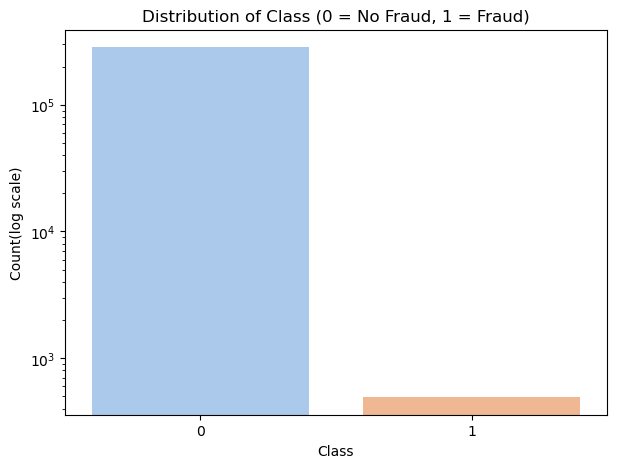

In [7]:
#checking how imbalanced the dataset is
class_counts = credit_card_data["Class"].value_counts()
print(class_counts)
print('Class 0 is:', round(credit_card_data['Class'].value_counts()[0]/len(credit_card_data) * 100,2), '% of the dataset')
print('Class 1 is:', round(credit_card_data['Class'].value_counts()[1]/len(credit_card_data) * 100,2), '% of the dataset')


#visualizing the imbalanced datasets
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=credit_card_data, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.yscale('log')
plt.ylabel('Count(log scale)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


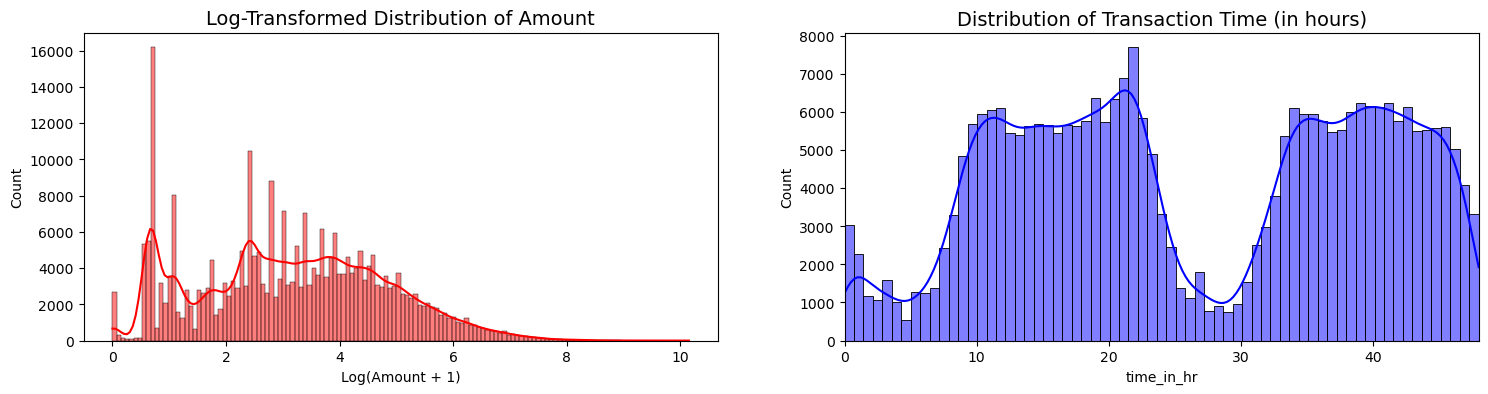

In [8]:
#Plotting the distribution to understand data visually since the dataset is so large
amount_val = credit_card_data['Amount'].values

# Apply log transformation to 'Amount' to reduce skewness
log_amount_val = np.log1p(amount_val)
time_val = credit_card_data['Time'].values / 3600  # Convert seconds to hours
credit_card_data['time_in_hr']=time_val
# Creating subplots
fig, ax1 = plt.subplots(1, 2, figsize=(18, 4))

# Plotting the distribution of 'Amount'
sns.histplot(log_amount_val, ax=ax1[0], color='r', kde=True)
ax1[0].set_title('Log-Transformed Distribution of Amount', fontsize=14)
ax1[0].set_xlabel('Log(Amount + 1)')

# Plotting the distribution of 'Time' (in hours)
sns.histplot(credit_card_data['time_in_hr'], ax=ax1[1], color='b', kde=True)
ax1[1].set_title('Distribution of Transaction Time (in hours)', fontsize=14)
ax1[1].set_xlim([min(credit_card_data['time_in_hr']), max(credit_card_data['time_in_hr'])])

# Show the plots
plt.show()

Time variable


Text(0, 0.5, '# transactions')

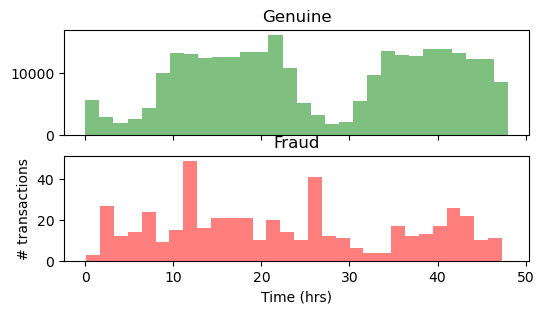

In [9]:
#plot Time to see if there is any trend based on time
print("Time variable")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(credit_card_data.time_in_hr[credit_card_data.Class==0],bins=30,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(credit_card_data.time_in_hr[credit_card_data.Class==1],bins=30,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

Text(0, 0.5, '# transactions')

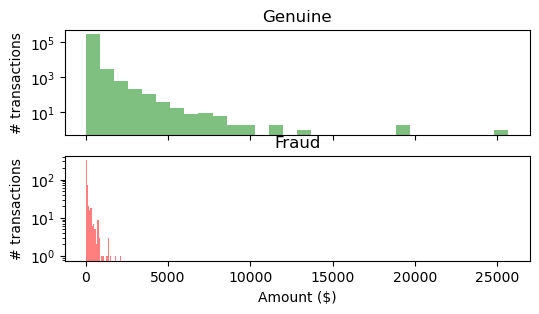

In [10]:
#plotting the visualization based on the amount

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(credit_card_data.Amount[credit_card_data.Class==0],bins=30,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(credit_card_data.Amount[credit_card_data.Class==1],bins=30,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [11]:
# Detect outliers using Z-score for 'Amount'

# Calculate Z-scores
z_scores = np.abs((credit_card_data['Amount'] - credit_card_data['Amount'].mean()) / credit_card_data['Amount'].std())
outliers = np.where(z_scores > 3)[0]  # Set a threshold for outliers (e.g., z-score > 3)
print(f"Number of Outliers in 'Amount': {len(outliers)}")


inf_counts = credit_card_data.isin([np.inf, -np.inf]).sum()
print("Number of infinity values in each column:\n", inf_counts)


Number of Outliers in 'Amount': 4076
Number of infinity values in each column:
 Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
time_in_hr    0
dtype: int64


In [12]:
# calculate the percentage of fraudulent transactions in different ranges 

bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
credit_card_data['Amount Range'] = pd.cut(credit_card_data['Amount'], bins=bins, labels=labels)

# calculate the counts of fraud in each amount range 
fraud_counts = credit_card_data.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts*100

# display the percentage of in each amount range
print("Percentage of Fraudulent Transactions in Each Amount Range:")
print(fraud_counts)

Percentage of Fraudulent Transactions in Each Amount Range:
               Non-Fraud     Fraud
Amount Range                      
0-50           99.852553  0.147447
51-100         99.849681  0.150319
101-200        99.837375  0.162625
201-500        99.746128  0.253872
501-1000       99.580780  0.419220
1001-5000      99.688042  0.311958
5001-10000    100.000000  0.000000
10001+        100.000000  0.000000


C:\Users\reshu\AppData\Local\Temp\ipykernel_20300\1053318245.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = credit_card_data.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)


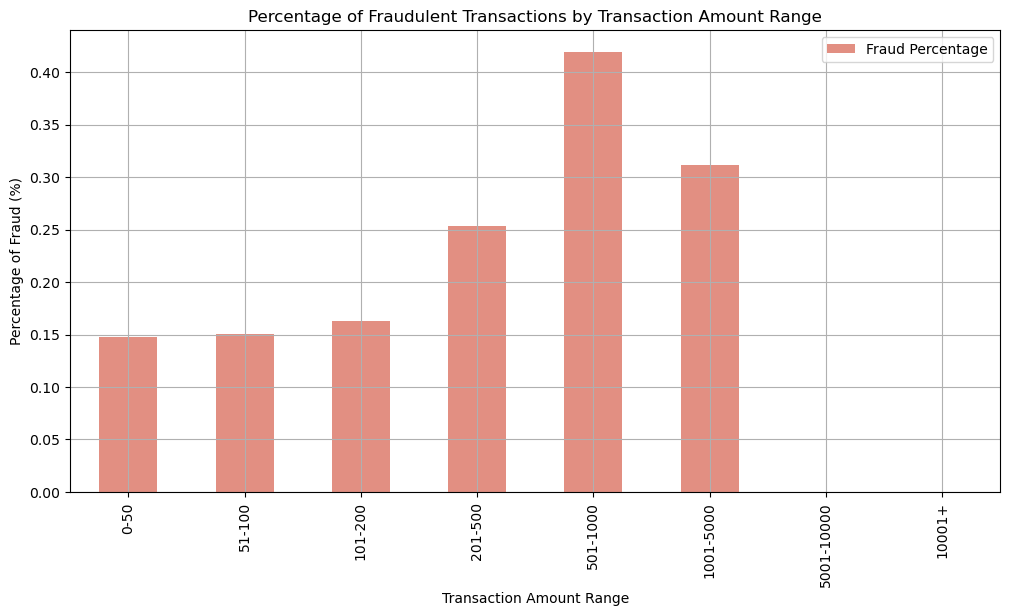

In [13]:
# plotting the percentage of fraudulent transactions in each amount range
plt.figure(figsize=(12, 6))
fraud_counts['Fraud'].plot(kind='bar', color='#d6604d', alpha=0.7, label='Fraud Percentage')
plt.title('Percentage of Fraudulent Transactions by Transaction Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Percentage of Fraud (%)')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1600x2400 with 0 Axes>

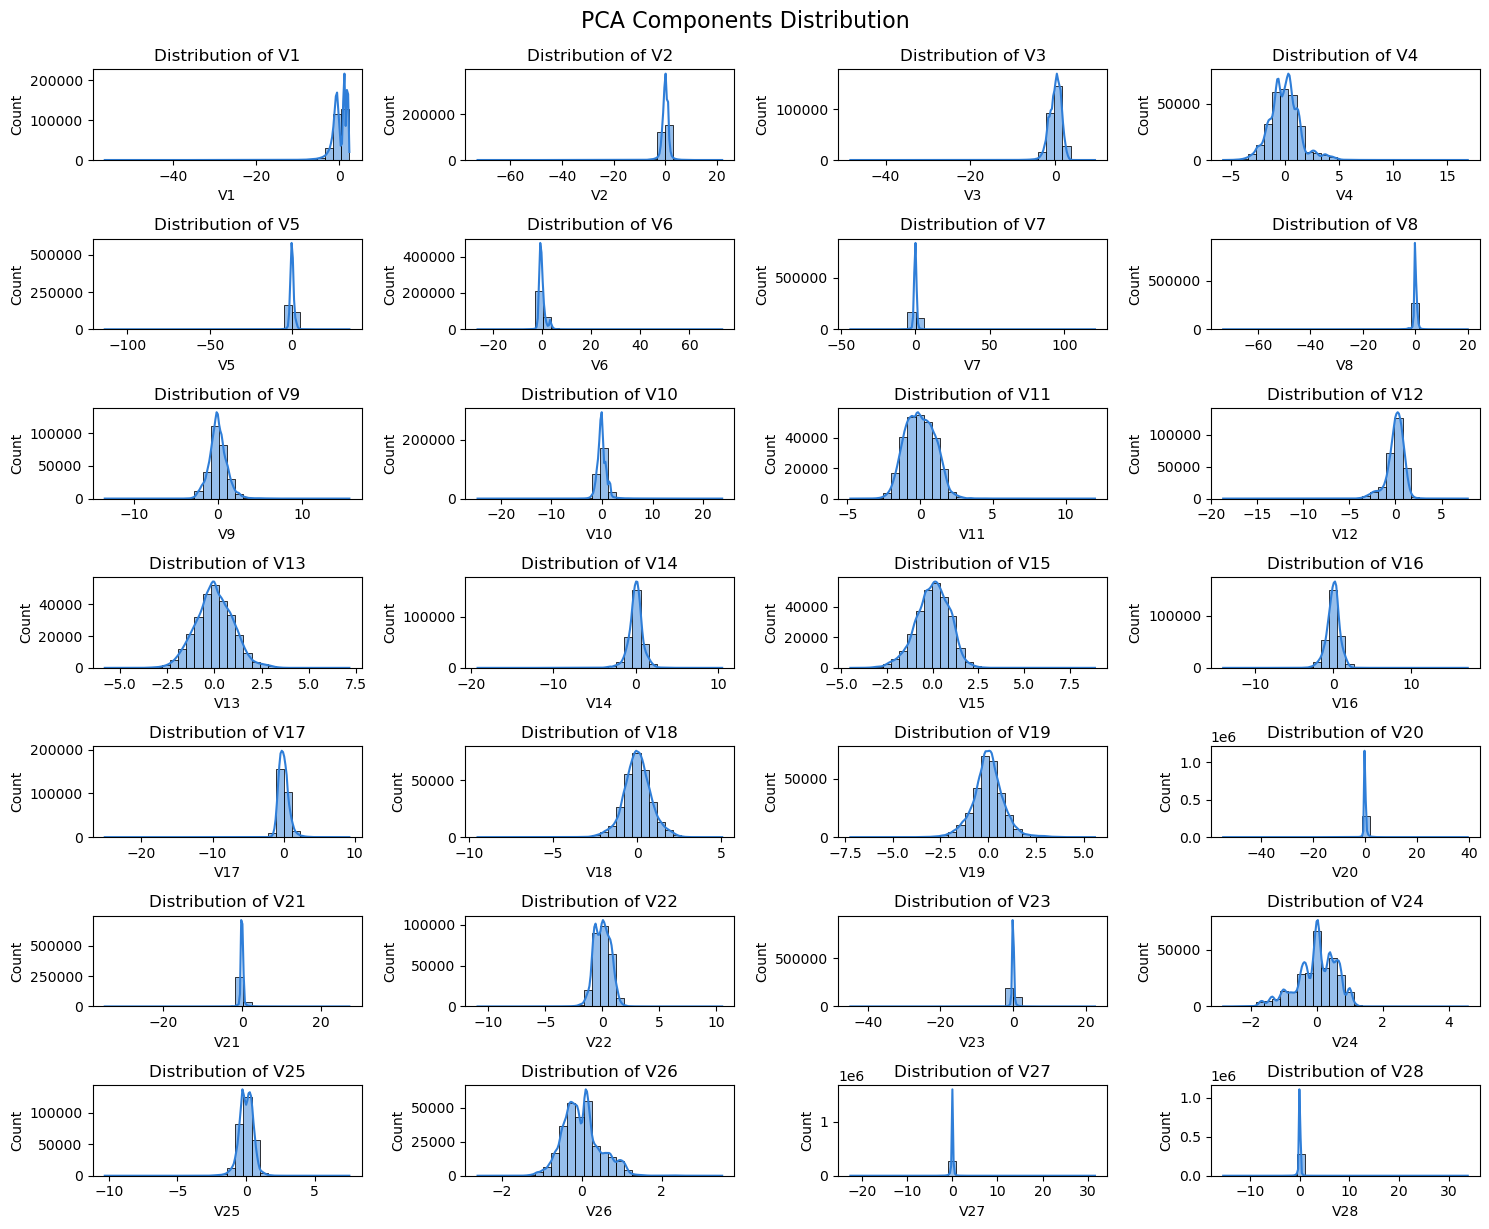

In [14]:
# PCA Component Distribution

credit_card_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
plt.figure(figsize=(16, 24))


# List of PCA components (V1 to V28)
pca_components = [f'V{i}' for i in range(1, 29)]

# Plotting distributions of PCA components
plt.figure(figsize=(15, 12))
for i, component in enumerate(pca_components, 1):
    plt.subplot(7, 4, i)  # 7 rows and 4 columns for 28 PCA components
    sns.histplot(credit_card_data[component], kde=True, bins=30, color='#2f7ed8')
    plt.title(f'Distribution of {component}')
    
plt.tight_layout()
plt.suptitle('PCA Components Distribution', y=1.02, fontsize=16)
plt.show()

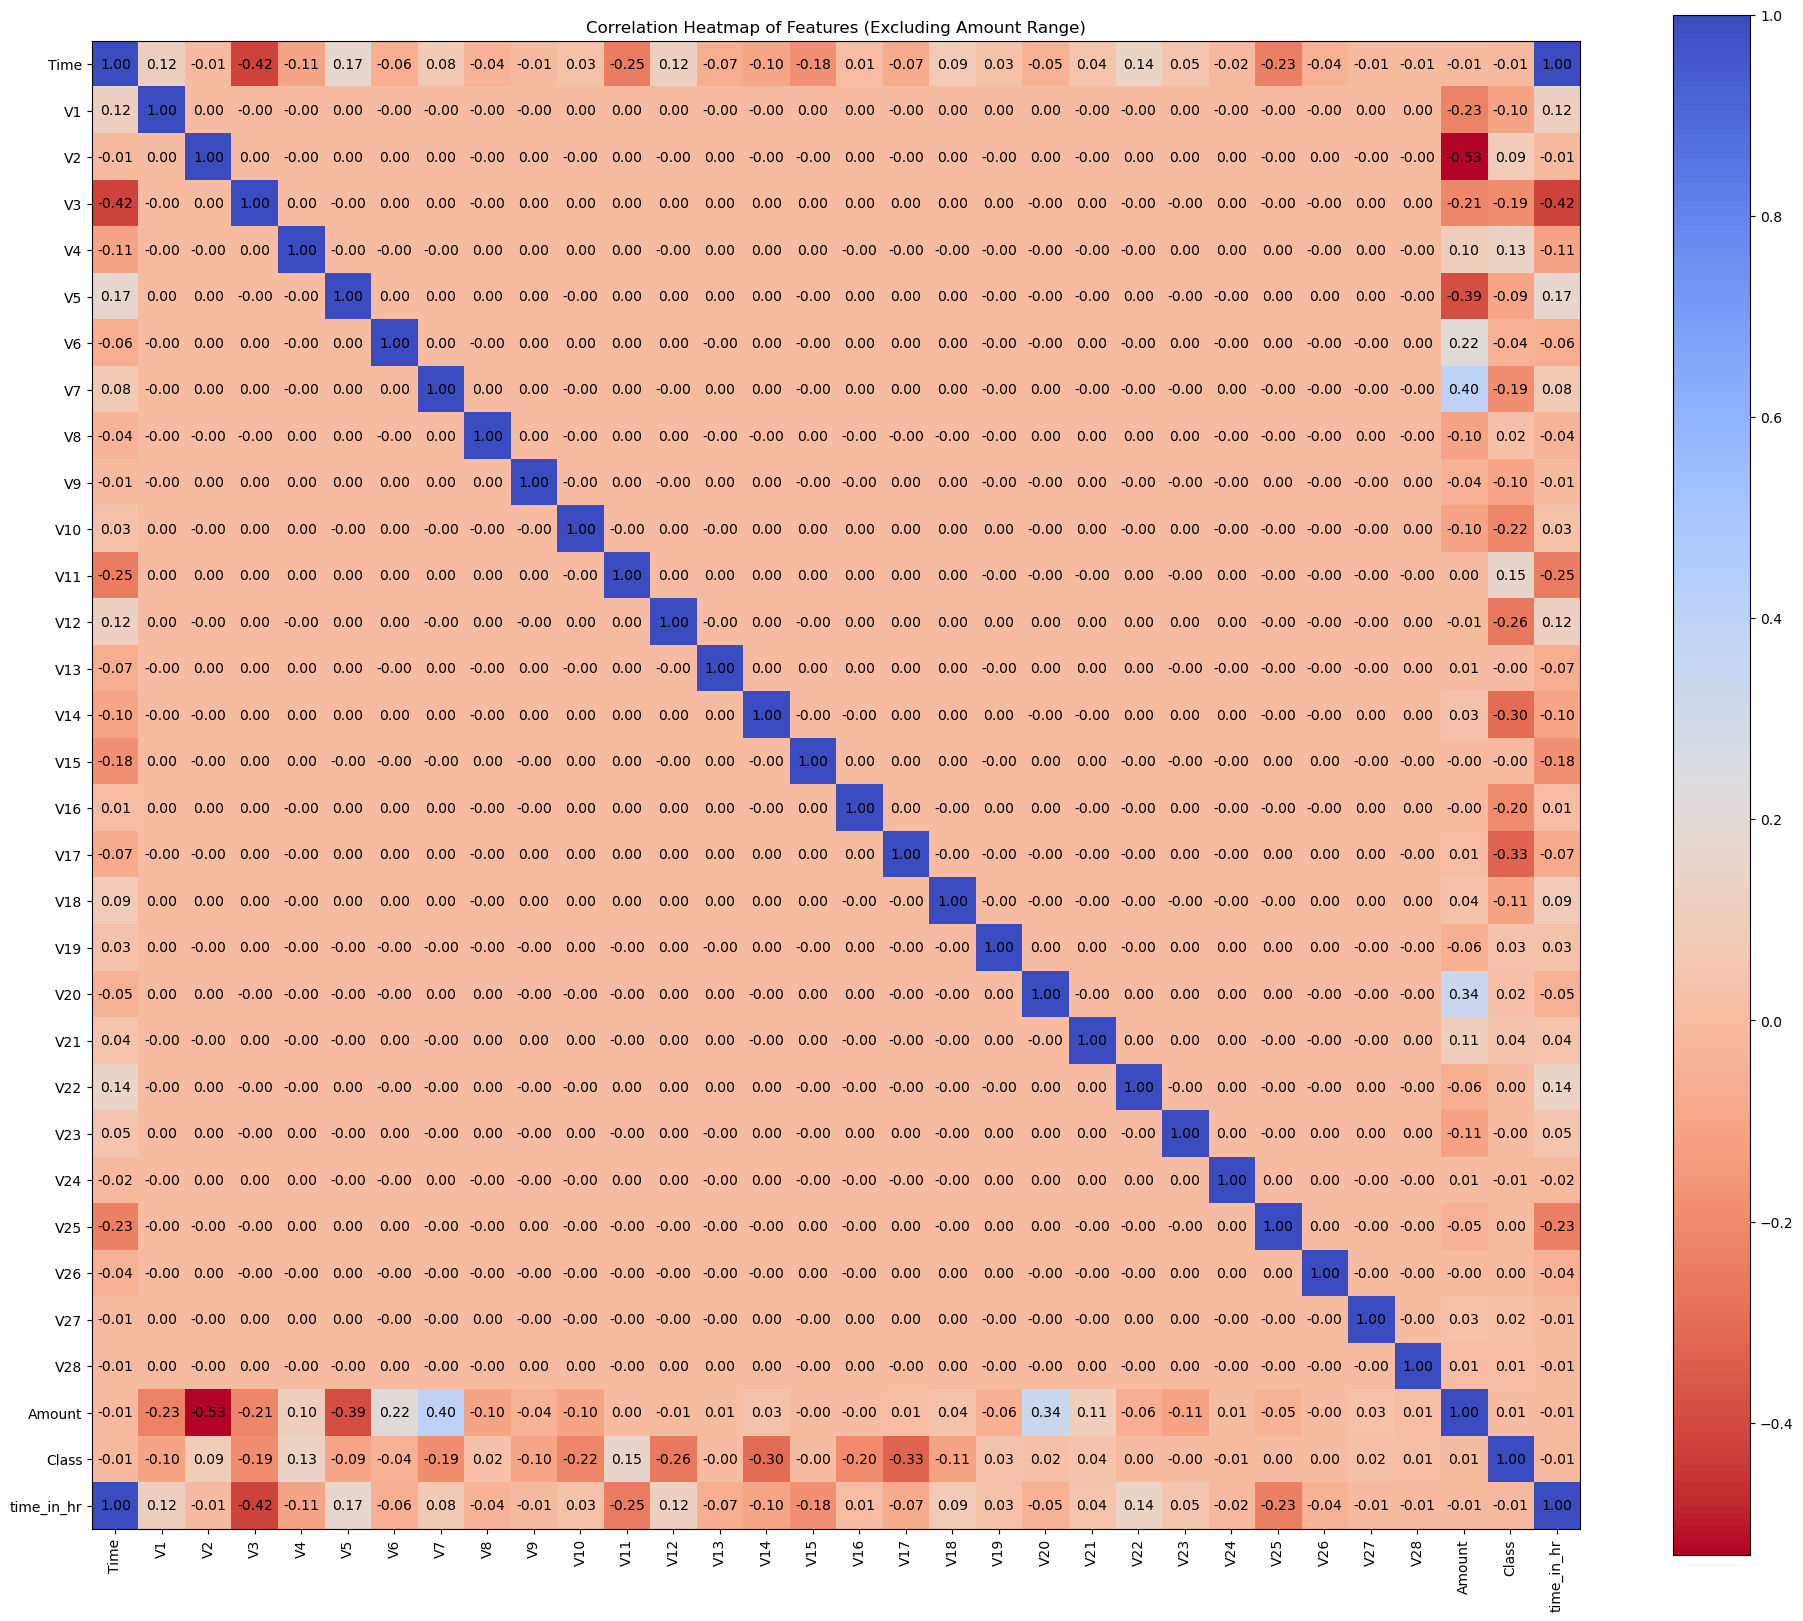

In [15]:
#correlation analysis
corr_matrix = credit_card_data.drop(columns=['Amount Range']).corr()
plt.figure(figsize=(24, 20))
plt.imshow(corr_matrix, cmap='coolwarm_r', interpolation='nearest')
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color="black")

# Set the ticks to show column names
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Heatmap of Features (Excluding Amount Range)')
plt.show()

In [14]:
# Scaling the remaining columns with respect to other colulmns
rob_scaler = RobustScaler()

# Apply Label Encoding to the 'Amount Range' feature
credit_card_data['Time'] = rob_scaler.fit_transform(credit_card_data['Time'].values.reshape(-1, 1))
credit_card_data['Amount'] = rob_scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
credit_card_data['time_in_hr'] = rob_scaler.fit_transform(credit_card_data['time_in_hr'].values.reshape(-1, 1))

#making them permanent
scaled_time = credit_card_data['Time']
scaled_amount = credit_card_data['Amount']
scaled_hour = credit_card_data['time_in_hr']

credit_card_data.drop(['Time', 'Amount', 'time_in_hr'], axis=1, inplace=True)

credit_card_data.insert(0, 'Time', scaled_time)
credit_card_data.insert(29, 'Amount', scaled_amount)
credit_card_data.insert(31, 'time_in_hr', scaled_hour)

#confirming
credit_card_data.head()
print(credit_card_data.dtypes)


Time             float64
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Amount           float64
Class              int64
time_in_hr       float64
Amount Range    category
dtype: object


Original dataset shape: (227845, 31), (227845,)
SMOTE dataset shape: (272941, 31), (272941,)


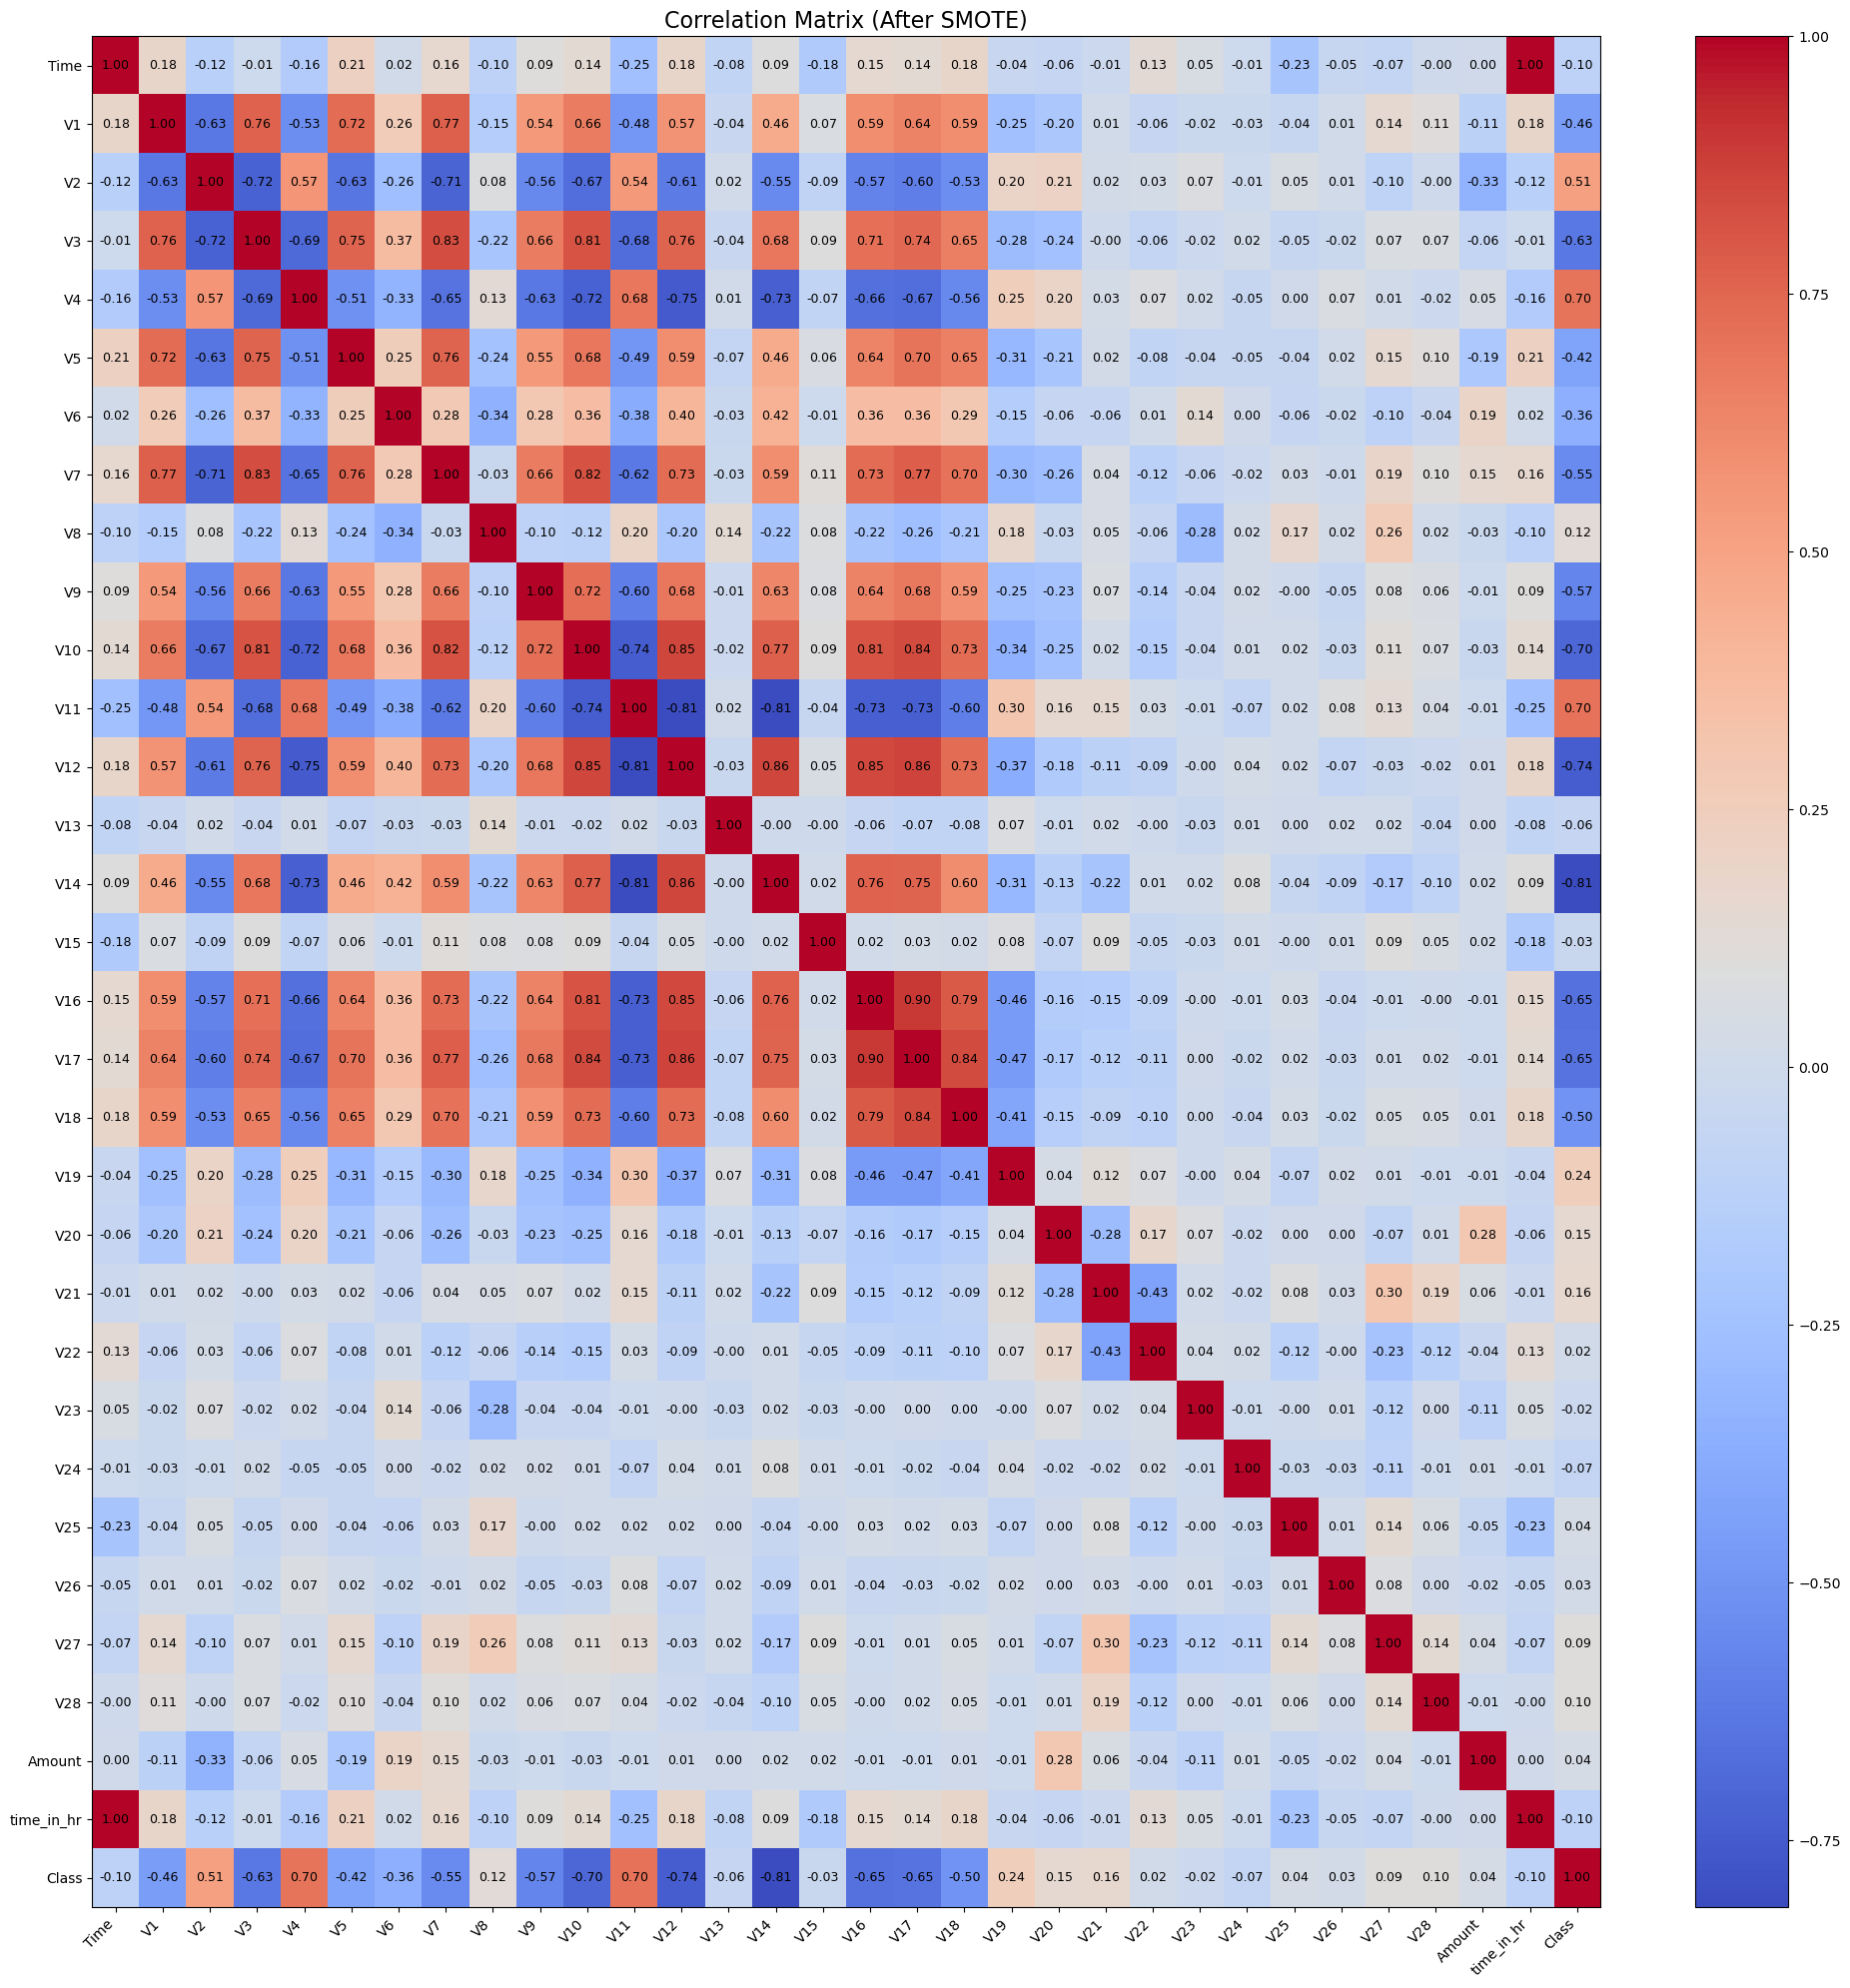

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Prepare your dataset
X = credit_card_data.drop(columns=['Class', 'Amount Range'])  # Drop target and irrelevant columns
y = credit_card_data['Class']  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Apply SMOTE to the training set only
smote = SMOTE(k_neighbors = 7, sampling_strategy = 0.20, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape}, {y_train.shape}")
print(f"SMOTE dataset shape: {X_train_smote.shape}, {y_train_smote.shape}")

# Step 4: Create a DataFrame with the resampled data
resampled_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
resampled_df['Class'] = y_train_smote

# Step 5: Calculate the correlation matrix
correlation_matrix = resampled_df.corr()

# Step 6: Visualize the correlation matrix using `imshow`
plt.figure(figsize=(20, 20))
cax = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(cax)

# Step 7: Add annotations for better visibility
n_features = correlation_matrix.shape[0]
for i in range(n_features):
    for j in range(n_features):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black', fontsize=9)

# Step 8: Add axis labels and title
plt.xticks(ticks=np.arange(n_features), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(n_features), labels=correlation_matrix.columns)
plt.title('Correlation Matrix (After SMOTE)', fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()


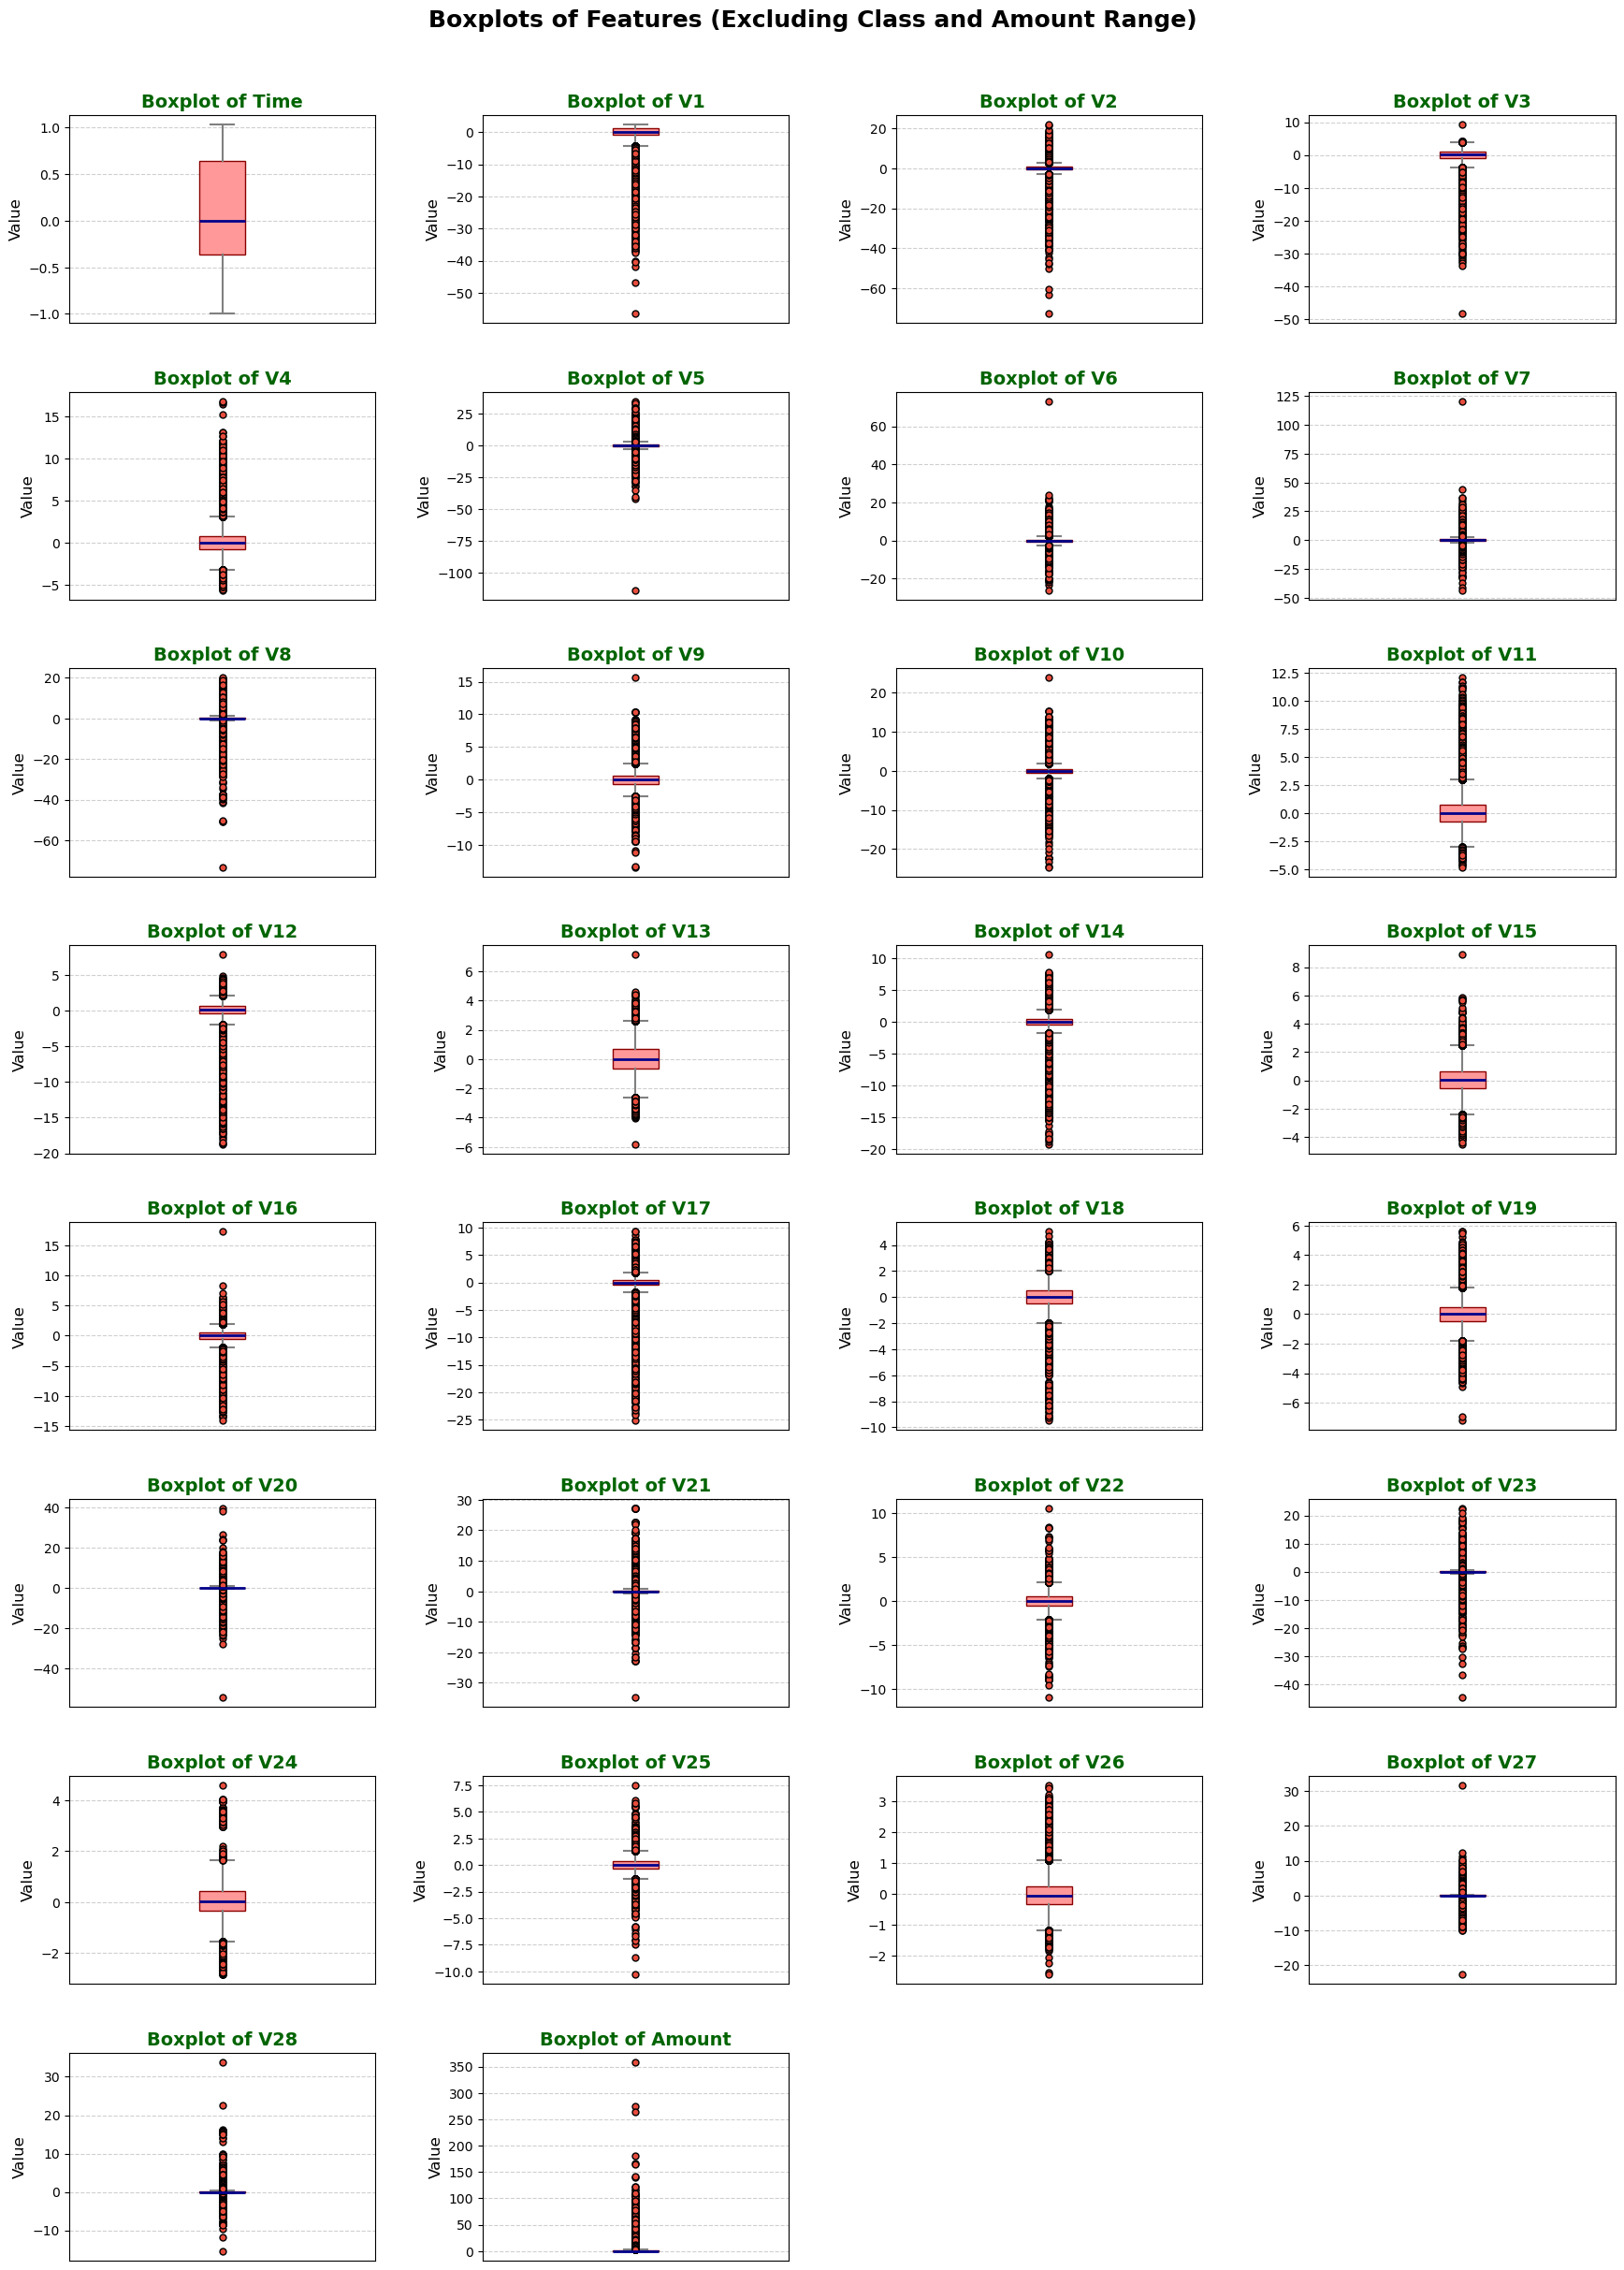

In [44]:
# List of features excluding 'Class' and 'Amount Range'
features = [col for col in credit_card_data.columns if col not in ['Class', 'Amount Range', "time_in_hr"]]

# Set the overall figure size for better aesthetics
plt.figure(figsize=(18, len(features) * 0.8))

# Loop through each feature and create a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features) // 4 + 1, 4, i)  # Arrange in rows of 4 columns
    
    # Draw the boxplot
    plt.boxplot(
        credit_card_data[feature].dropna(),
        patch_artist=True,
        boxprops=dict(facecolor='#ff9999', color='darkred'),
        medianprops=dict(color='darkblue', linewidth=2),
        whiskerprops=dict(color='gray', linewidth=1.5),
        capprops=dict(color='gray', linewidth=1.5),
        flierprops=dict(marker='o', markerfacecolor='#e74c3c', markersize=5, linestyle='none')
    )
    
    # Adding titles and labels
    plt.title(f'Boxplot of {feature}', fontsize=14, fontweight='bold', color='darkgreen')
    plt.xticks([])
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.ylabel('Value', fontsize=12)

# Adjust the layout to prevent overlapping and improve spacing
plt.tight_layout(pad=3.0)
plt.suptitle('Boxplots of Features (Excluding Class and Amount Range)', fontsize=18, fontweight='bold', y=1.02)
plt.show()

𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠, 𝐓𝐞𝐬𝐭𝐢𝐧𝐠 & 𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧
1. 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚𝐬𝐞𝐭
2. 𝐁𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

𝟏. 𝐆𝐚𝐮𝐬𝐬𝐢𝐚𝐧 𝐍𝐚𝐢𝐯𝐞 𝐁𝐚𝐲𝐞𝐬

𝟏𝐚. 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚𝐬𝐞𝐭


StratifiedKFold Cross-Validation Scores: [0.9553986482129564, 0.9680191820247744, 0.9693588636059387, 0.956059623434341, 0.9568111612335699]
Mean Cross-Validation ROC AUC: 0.9611
Standard Deviation of ROC AUC: 0.0062


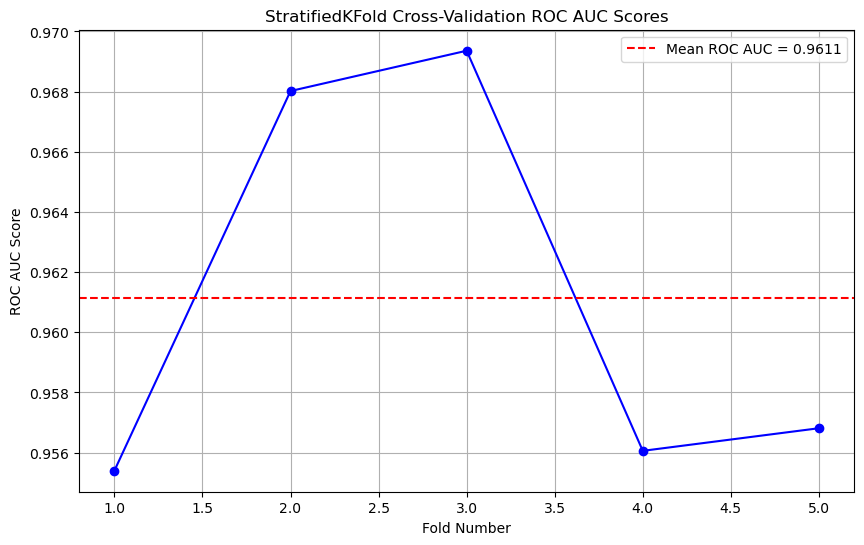

In [16]:
# Step 1: Prepare your dataset
Gaussian_NB_x = credit_card_data.drop(columns=['Class', 'Amount Range'])
Gaussian_NB_y = credit_card_data['Class']

# Step 2: Split the dataset into training and testing sets
GNB_x_train, GNB_x_test, GNB_y_train, GNB_y_test = train_test_split(
    Gaussian_NB_x, Gaussian_NB_y, test_size=0.2, random_state=42
)

# Step 3: Perform Stratified K-Fold Cross-Validation BEFORE training the model
GNB_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
GNB_cross_val_scores = []

for train_idx, val_idx in GNB_skf.split(Gaussian_NB_x, Gaussian_NB_y):
    # Split into stratified folds
    X_train_fold, X_val_fold = Gaussian_NB_x.iloc[train_idx], Gaussian_NB_x.iloc[val_idx]
    y_train_fold, y_val_fold = Gaussian_NB_y.iloc[train_idx], Gaussian_NB_y.iloc[val_idx]

    # Train a Gaussian Naive Bayes model on the current fold
    gnb = GaussianNB()
    gnb.fit(X_train_fold, y_train_fold)

    # Evaluate using ROC AUC
    y_val_pred_prob = gnb.predict_proba(X_val_fold)[:, 1]
    fold_auc = roc_auc_score(y_val_fold, y_val_pred_prob)
    GNB_cross_val_scores.append(fold_auc)

# Step 4: Summarize Stratified K-Fold results
print("\nStratifiedKFold Cross-Validation Scores:", GNB_cross_val_scores)
print(f"Mean Cross-Validation ROC AUC: {np.mean(GNB_cross_val_scores):.4f}")
print(f"Standard Deviation of ROC AUC: {np.std(GNB_cross_val_scores):.4f}")

# Plot Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(GNB_cross_val_scores) + 1),
    GNB_cross_val_scores,
    marker='o',
    linestyle='-',
    color='blue',
)
plt.axhline(
    y=np.mean(GNB_cross_val_scores),
    color='red',
    linestyle='--',
    label=f'Mean ROC AUC = {np.mean(GNB_cross_val_scores):.4f}',
)
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('StratifiedKFold Cross-Validation ROC AUC Scores')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Fine-Tune the var_smoothing Hyperparameter
var_smoothing_values = np.logspace(-10, -1, 10)
roc_auc_scores = []

for var_smoothing in var_smoothing_values:
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(GNB_x_train, GNB_y_train)
    GNB_y_pred_prob = gnb.predict_proba(GNB_x_test)[:, 1]
    roc_auc = roc_auc_score(GNB_y_test, GNB_y_pred_prob)
    roc_auc_scores.append(roc_auc)

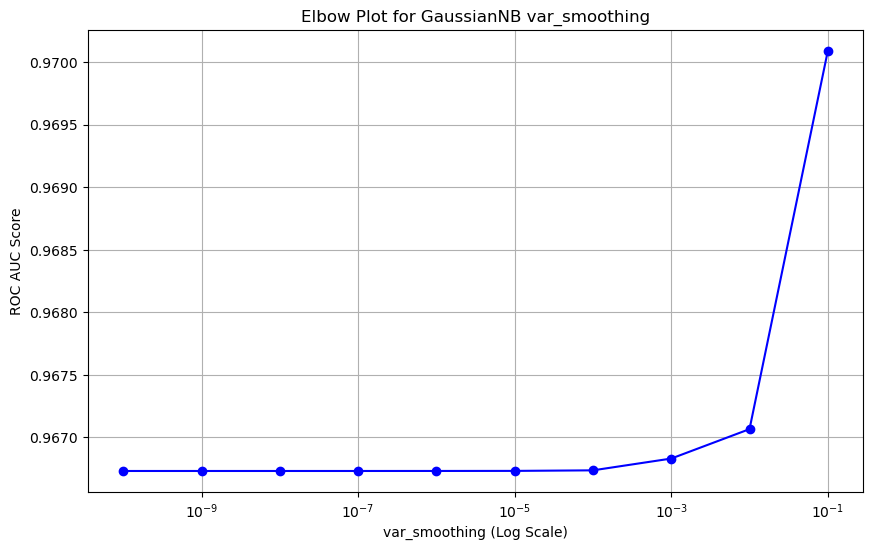

Best var_smoothing: 0.1

Confusion Matrix:
[[56337   527]
 [   29    69]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.70      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.85      0.60     56962
weighted avg       1.00      0.99      0.99     56962


Final Model Metrics:
Accuracy: 0.9902
Recall: 0.7041
Precision: 0.1158
F1 Score: 0.1988
ROC AUC Score: 0.9701
Testing Error: 0.0098


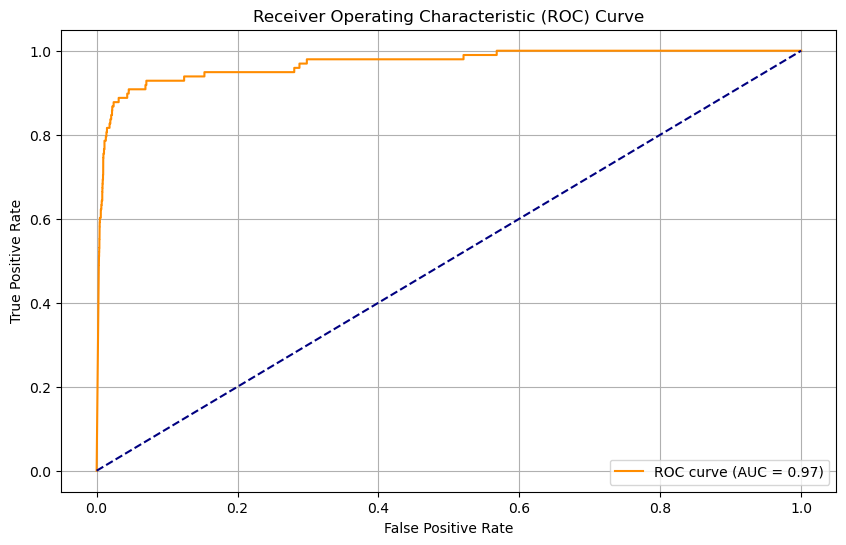

In [17]:
# Step 6: Plot Elbow Plot for var_smoothing
plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, roc_auc_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('var_smoothing (Log Scale)')
plt.ylabel('ROC AUC Score')
plt.title('Elbow Plot for GaussianNB var_smoothing')
plt.grid(True)
plt.show()

# Step 7: Find the best var_smoothing and train the final model
best_var_smoothing = var_smoothing_values[np.argmax(roc_auc_scores)]
print(f"Best var_smoothing: {best_var_smoothing}")

gnb_best = GaussianNB(var_smoothing=best_var_smoothing)
gnb_best.fit(GNB_x_train, GNB_y_train)

# Step 8: Evaluate the Final Model
GNB_y_pred = gnb_best.predict(GNB_x_test)
GNB_y_pred_prob = gnb_best.predict_proba(GNB_x_test)[:, 1]

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(GNB_y_test, GNB_y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(GNB_y_test, GNB_y_pred))

# Performance Metrics
accuracy = accuracy_score(GNB_y_test, GNB_y_pred)
recall = recall_score(GNB_y_test, GNB_y_pred)
precision = precision_score(GNB_y_test, GNB_y_pred)
f1 = f1_score(GNB_y_test, GNB_y_pred)
roc_auc = roc_auc_score(GNB_y_test, GNB_y_pred_prob)
GNB_test_error = 1 - accuracy

print("\nFinal Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Testing Error: {GNB_test_error:.4f}")

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(GNB_y_test, GNB_y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

If your F1 score is 0.11, that indicates a significant problem with your model's performance. An F1 score that low means that your model is struggling to balance precision and recall, especially in the context of a highly imbalanced dataset like credit card fraud detection

as Recall is 81% but precision is just 60%

shows overfitting

𝟏𝐛. 𝐒𝐌𝐎𝐓𝐄 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'gnb__var_smoothing': 1e-10}

Confusion Matrix:
[[44253  1238]
 [ 1443  7655]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     45491
           1       0.86      0.84      0.85      9098

    accuracy                           0.95     54589
   macro avg       0.91      0.91      0.91     54589
weighted avg       0.95      0.95      0.95     54589


Accuracy Score: 0.9508875414460789
Recall Score: 0.8413937129039349
Precision Score: 0.8607893849094793
F1 Score: 0.8509810460785949
ROC AUC Score: 0.9475790468802867
Testing error: 0.0491124585539211


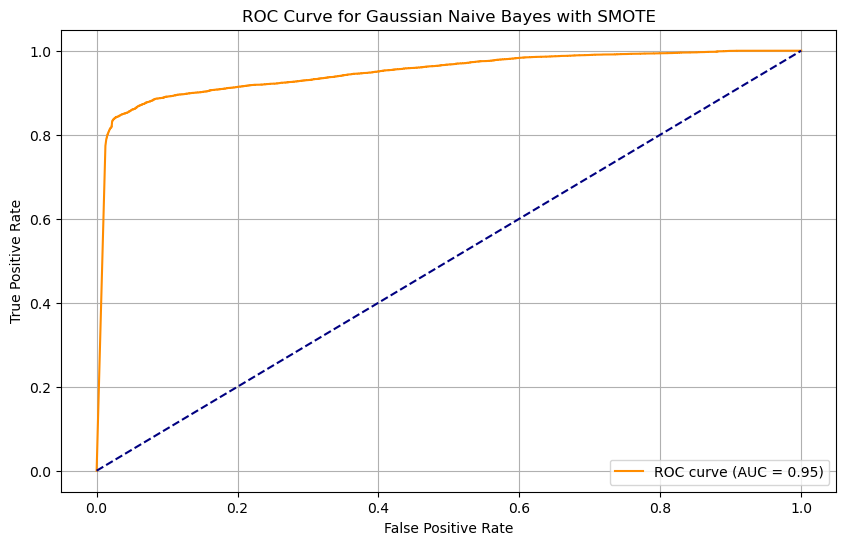


Threshold Analysis:
Threshold: 0.10, Precision: 0.85, Recall: 0.84, F1: 0.85
Threshold: 0.20, Precision: 0.86, Recall: 0.84, F1: 0.85
Threshold: 0.30, Precision: 0.86, Recall: 0.84, F1: 0.85
Threshold: 0.40, Precision: 0.86, Recall: 0.84, F1: 0.85
Threshold: 0.50, Precision: 0.86, Recall: 0.84, F1: 0.85
Threshold: 0.60, Precision: 0.86, Recall: 0.84, F1: 0.85
Threshold: 0.70, Precision: 0.87, Recall: 0.84, F1: 0.85
Threshold: 0.80, Precision: 0.87, Recall: 0.84, F1: 0.85
Threshold: 0.90, Precision: 0.87, Recall: 0.84, F1: 0.85


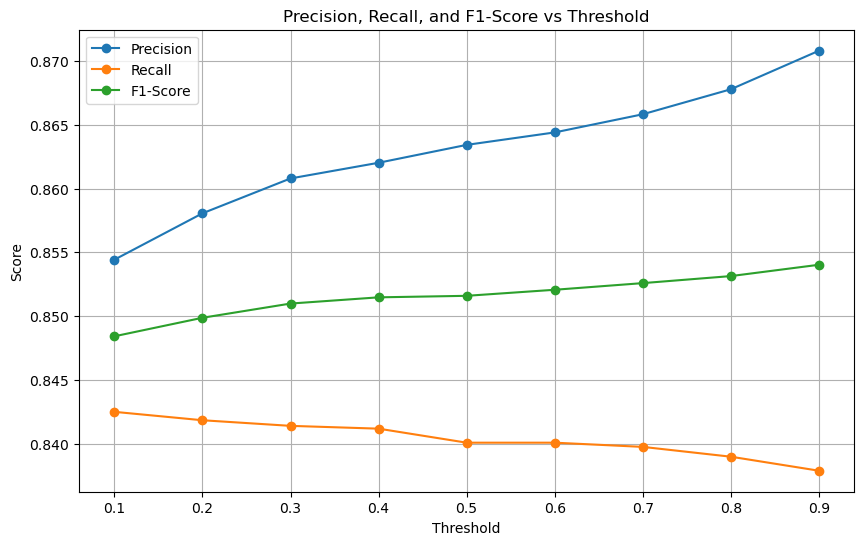

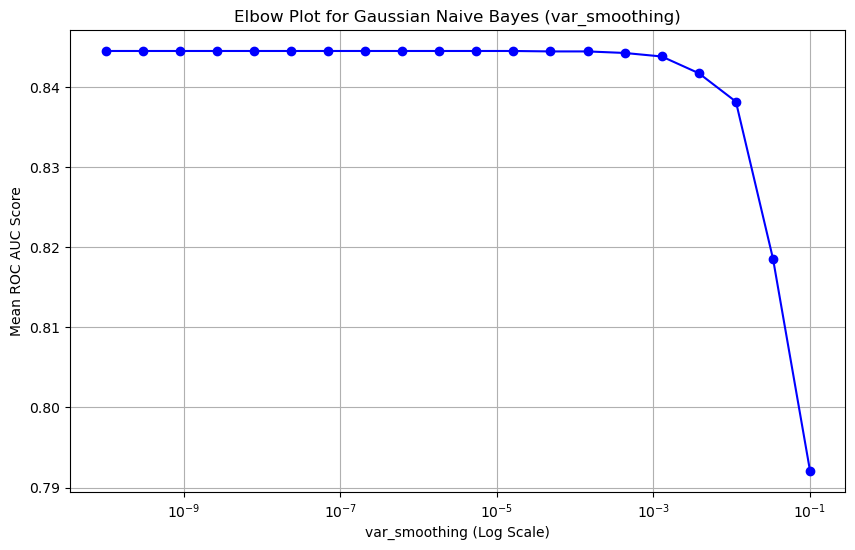

In [56]:
# Step 1: Prepare your dataset
X = X_train_smote
y = y_train_smote

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define the pipeline with SMOTE and Gaussian Naive Bayes
pipeline = Pipeline([
    ('gnb', GaussianNB(priors=[0.2, 0.8]))
])

# Step 4: Define the parameter grid for GridSearchCV
param_grid = {
    'gnb__var_smoothing': np.logspace(-10, -1, 20)  # Range of var_smoothing values
}

# Step 5: Perform hyperparameter tuning using GridSearchCV with the pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and parameters
best_pipeline_GNB = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Step 7: Make predictions on the original test set (not the resampled one)
y_pred_prob = best_pipeline_GNB.predict_proba(X_test)[:, 1]  # Predicted probabilities

# Step 7a: Apply threshold adjustment
threshold = 0.3  # You can adjust this value as needed
y_pred = (y_pred_prob >= threshold).astype(int)  # Apply custom threshold

# Step 8: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nAccuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

test_error = 1 - accuracy
print("Testing error:", test_error)

# Step 9: Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes with SMOTE')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 10: Evaluate performance for different thresholds
from sklearn.metrics import precision_recall_fscore_support

thresholds = np.arange(0.1, 1.0, 0.1)  # Thresholds from 0.1 to 0.9
precisions, recalls, f1_scores = [], [], []

print("\nThreshold Analysis:")
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(f"Threshold: {thresh:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# Step 11: Plot Precision, Recall, and F1-Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 12: Elbow Plot for `var_smoothing` Parameter
results = grid_search.cv_results_
var_smoothing_values = [param['gnb__var_smoothing'] for param in results['params']]
roc_auc_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, roc_auc_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('var_smoothing (Log Scale)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Elbow Plot for Gaussian Naive Bayes (var_smoothing)')
plt.grid(True)
plt.show()


𝟐. 𝐋𝐨𝐠𝐢𝐬𝐭𝐢𝐜 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧  

𝟐.𝐚. 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [60]:
# Step 1: Prepare your dataset
Logistic_x = credit_card_data.drop(columns=['Class', 'Amount Range'])  # Features
Logistic_y = credit_card_data['Class']  # Target variable

# Step 2: Split the dataset into training and testing sets
Logistic_x_train, Logistic_x_test, Logistic_y_train, Logistic_y_test = train_test_split(
    Logistic_x, Logistic_y, test_size=0.2, stratify=Logistic_y, random_state=42
)

# Step 3: Define the parameter grid for GridSearchCV (reduced parameters)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # Reduced range for regularization strength
    'penalty': ['l1', 'l2'],          # Regularization method
    'solver': ['liblinear'],          # Solvers that support both l1 and l2 penalties
    'max_iter': [100, 200]                 # Fixed number of iterations
}

# Step 4: Perform hyperparameter tuning using GridSearchCV
log_reg = LogisticRegression(random_state=42)
log_grid_search_imbalanced = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
log_grid_search_imbalanced.fit(Logistic_x_train, Logistic_y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Cross-Validation Scores: [0.98844911 0.97936534 0.96317316 0.99356459 0.97993717]
Mean Cross-Validation Score: 0.9809
Standard Deviation of Cross-Validation Score: 0.0103


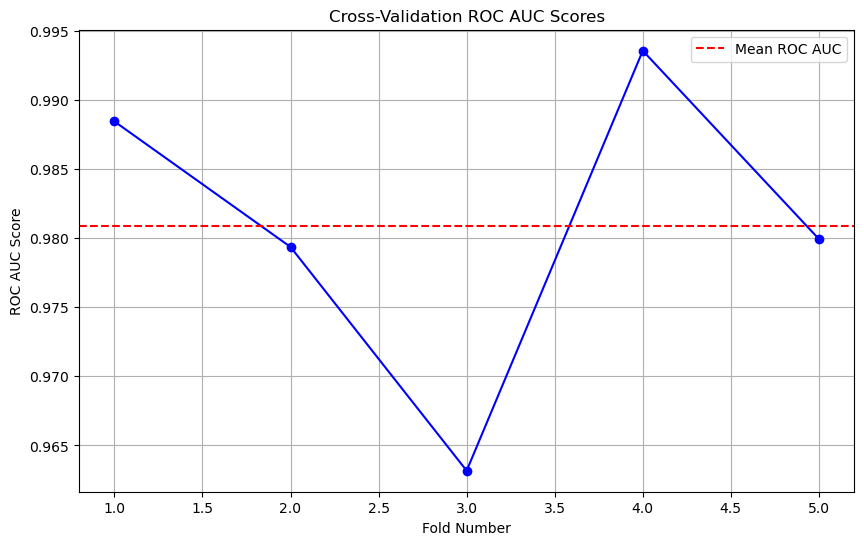


Confusion Matrix:
[[56851    13]
 [   36    62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9991397773954567
Recall Score: 0.6326530612244898
Precision Score: 0.8266666666666667
F1 Score: 0.7167630057803468
ROC AUC Score: 0.9653414017548494
Testing error: 0.0008602226045433259


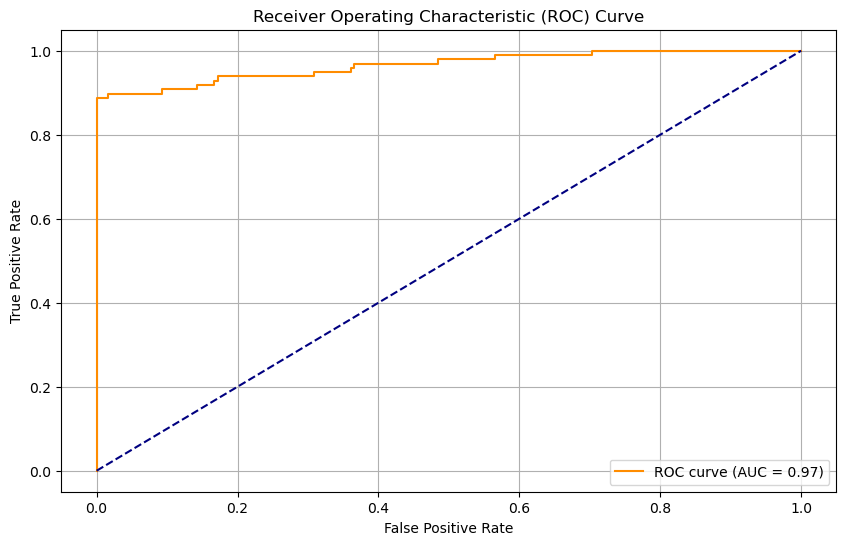

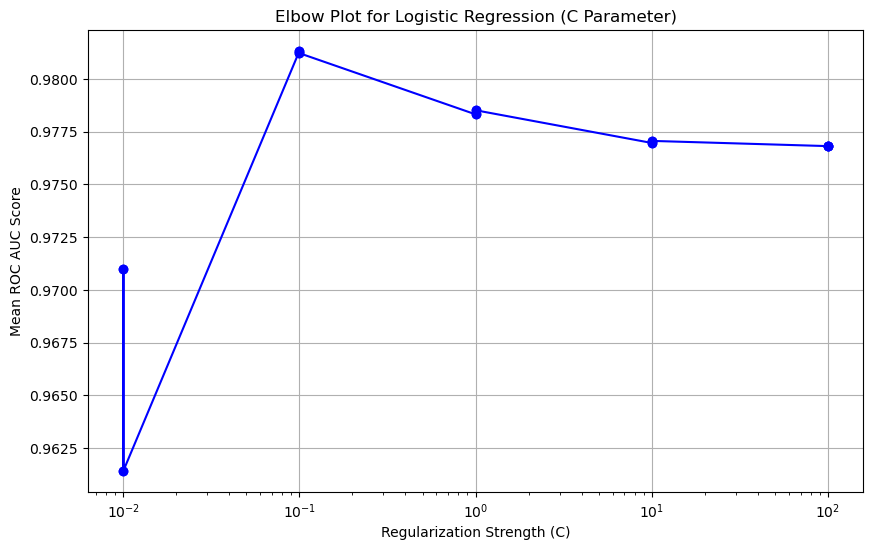

In [61]:
# Step 5: Get the best model and parameters
best_log_reg = log_grid_search_imbalanced.best_estimator_
print(f"Best Parameters: {log_grid_search_imbalanced.best_params_}")

# Step 6: Perform Cross-Validation using the best pipeline
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_log_reg, Logistic_x_train, Logistic_y_train, cv=skf, scoring='roc_auc')

# Step 7: Print Cross-Validation Results
print("\nCross-Validation Scores:", cross_val_scores)
print(f"Mean Cross-Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Score: {cross_val_scores.std():.4f}")

# Step 8: Plotting Cross-Validation ROC AUC Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cross_val_scores) + 1), cross_val_scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=cross_val_scores.mean(), color='red', linestyle='--', label='Mean ROC AUC')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('Cross-Validation ROC AUC Scores')
plt.grid(True)
plt.legend()
plt.show()

# Step 9: Evaluate the tuned model on the test set
Logistic_y_pred = best_log_reg.predict(Logistic_x_test)
Logistic_y_pred_prob = best_log_reg.predict_proba(Logistic_x_test)[:, 1]

# Classification metrics
print("\nConfusion Matrix:")
print(confusion_matrix(Logistic_y_test, Logistic_y_pred))

print("\nClassification Report:")
print(classification_report(Logistic_y_test, Logistic_y_pred))

accuracy = accuracy_score(Logistic_y_test, Logistic_y_pred)
recall = recall_score(Logistic_y_test, Logistic_y_pred)
precision = precision_score(Logistic_y_test, Logistic_y_pred)
f1 = f1_score(Logistic_y_test, Logistic_y_pred)
roc_auc = roc_auc_score(Logistic_y_test, Logistic_y_pred_prob)

print("\nAccuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Logistic_test_error = 1 - accuracy
print("Testing error:", Logistic_test_error)

# Step 10: Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(Logistic_y_test, Logistic_y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Step 11: Elbow Plot for `C` Parameter
results = log_grid_search_imbalanced.cv_results_
c_values = [param['C'] for param in results['params']]
roc_auc_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(c_values, roc_auc_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Elbow Plot for Logistic Regression (C Parameter)')
plt.grid(True)
plt.show()

𝟐𝐛. 𝐒𝐌𝐎𝐓𝐄 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [89]:
# Step 1: Prepare your dataset
X = X_train_smote  # Features
y = y_train_smote  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Define the pipeline with SMOTE and Logistic Regression
pipeline = Pipeline([
    ('log_reg', LogisticRegression(random_state=42, solver='liblinear'))
])

# Step 4: Define the parameter grid for GridSearchCV
param_grid = {
    'log_reg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000,10000],  # Regularization strength
    'log_reg__penalty': ['l1','l2'] # Use L2 penalty
}

# Step 5: Perform hyperparameter tuning using GridSearchCV with the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log_reg',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                        1000, 10000],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)


Best Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}

Cross-Validation Scores: [0.98979344 0.99012519 0.9887266  0.9886591  0.99052488]
Mean Cross-Validation Score: 0.9896
Standard Deviation of Cross-Validation Score: 0.0007


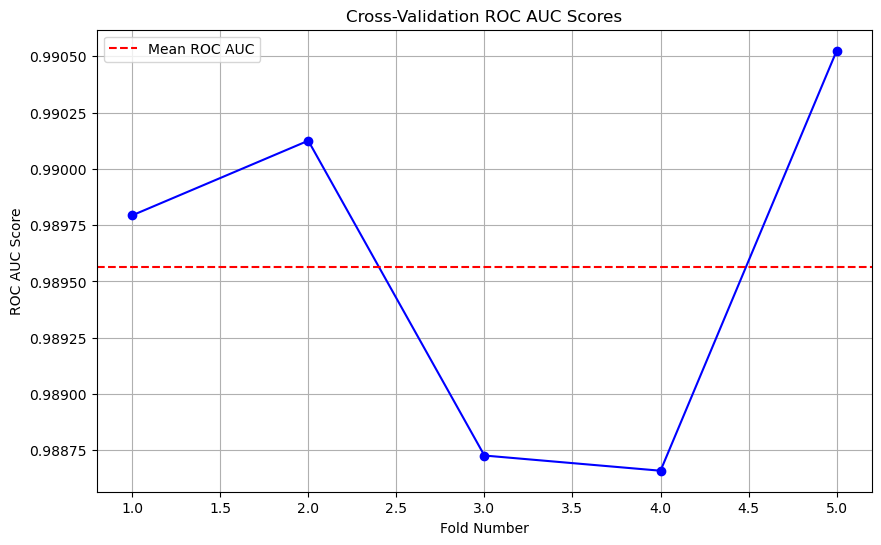


Confusion Matrix:
[[45233   258]
 [ 1249  7849]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     45491
           1       0.97      0.86      0.91      9098

    accuracy                           0.97     54589
   macro avg       0.97      0.93      0.95     54589
weighted avg       0.97      0.97      0.97     54589


Accuracy Score: 0.9723937056916229
Recall Score: 0.8627170806770719
Precision Score: 0.9681756506722585
F1 Score: 0.9124091833769253
ROC AUC Score: 0.9887964777506737
Testing error: 0.027606294308377133


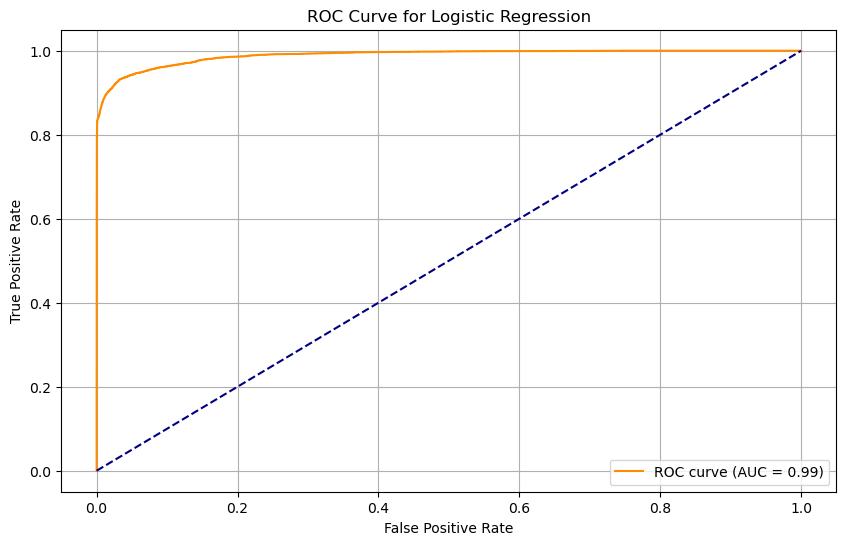

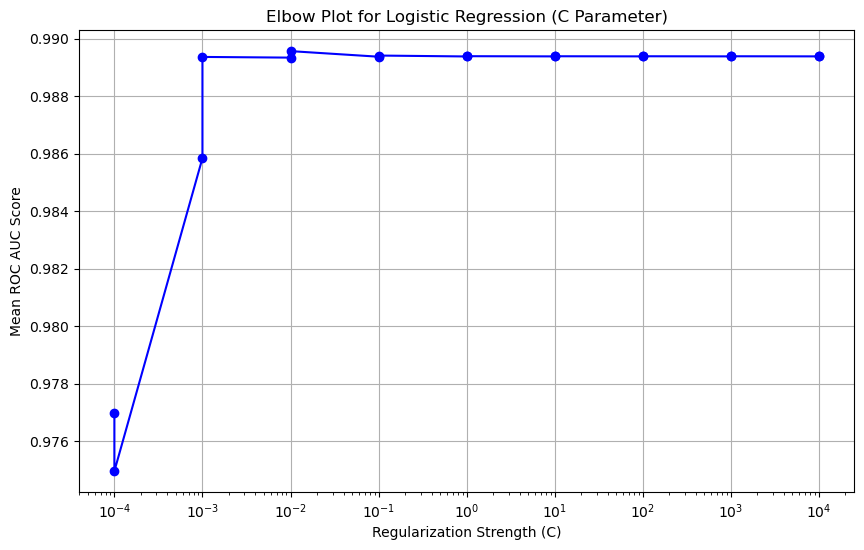

In [90]:
# Step 6: Get the best model and parameters
best_pipeline_log = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Step 7: Perform Cross-Validation using the best pipeline
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_pipeline_log, X_train, y_train, cv=skf, scoring='roc_auc')

# Step 8: Print Cross-Validation Results
print("\nCross-Validation Scores:", cross_val_scores)
print(f"Mean Cross-Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Score: {cross_val_scores.std():.4f}")

# Step 9: Plotting Cross-Validation ROC AUC Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cross_val_scores) + 1), cross_val_scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=cross_val_scores.mean(), color='red', linestyle='--', label='Mean ROC AUC')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('Cross-Validation ROC AUC Scores')
plt.grid(True)
plt.legend()
plt.show()

# Step 10: Make predictions on the original test set (not the resampled one)
y_pred = best_pipeline_log.predict(X_test)
y_pred_prob = best_pipeline_log.predict_proba(X_test)[:, 1]

# Step 11: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nAccuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

test_error = 1 - accuracy
print("Testing error:", test_error)

# Step 12: Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 13: Elbow Plot for `C` Parameter
results = grid_search.cv_results_
c_values = [param['log_reg__C'] for param in results['params']]
roc_auc_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(c_values, roc_auc_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Elbow Plot for Logistic Regression (C Parameter)')
plt.grid(True)
plt.show()

𝟑. 𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫

𝟑. 𝐚. 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [91]:
# Step 1: Prepare your dataset
DecisionTree_x = credit_card_data.drop(columns=['Class', 'Amount Range'])
DecisionTree_y = credit_card_data['Class']

# Step 2: Split the dataset into training and testing sets
DecisionTree_x_train, DecisionTree_x_test, DecisionTree_y_train, DecisionTree_y_test = train_test_split(
    DecisionTree_x, DecisionTree_y, test_size=0.2, random_state=42
)

# Step 3: Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Limited range for tree depth
    'min_samples_split': [2, 3, 4, 5],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 5, 6],     # Minimum samples at leaf node
    'criterion': ['entropy']                # Split criterion
}

# Step 4: Perform hyperparameter tuning using GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_imbalanced = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_imbalanced.fit(DecisionTree_x_train, DecisionTree_y_train)

# Get the best model and parameters
best_dt_model = grid_search_imbalanced.best_estimator_
print("\nBest Parameters:", grid_search_imbalanced.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}



Cross-Validation Scores: [0.93807853 0.97478593 0.95350901 0.9600628  0.93849323]
Mean Cross-Validation Score: 0.9530
Standard Deviation of Cross-Validation Score: 0.0138


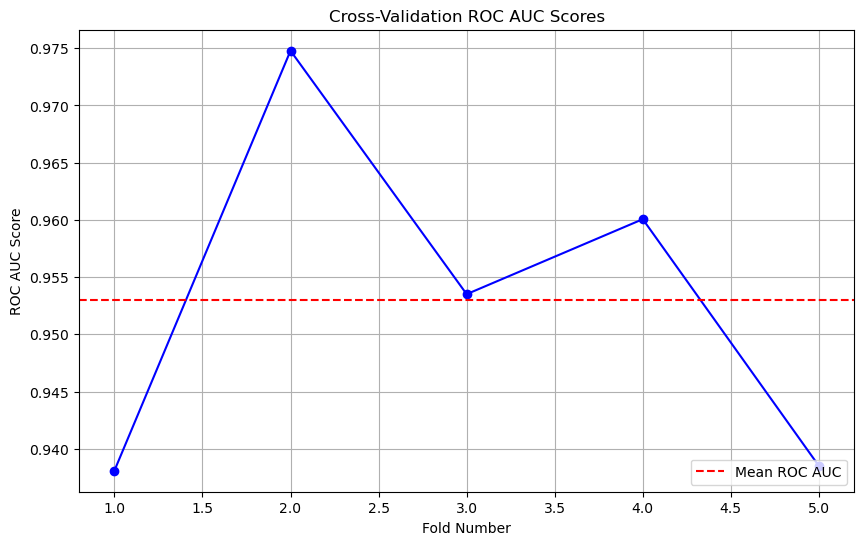


Confusion Matrix:
[[56850    14]
 [   18    80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9994382219725431
Recall Score: 0.8163265306122449
Precision Score: 0.851063829787234
F1 Score: 0.8333333333333334
ROC AUC Score: 0.9612204881249067
Testing error: 0.0005617780274569384


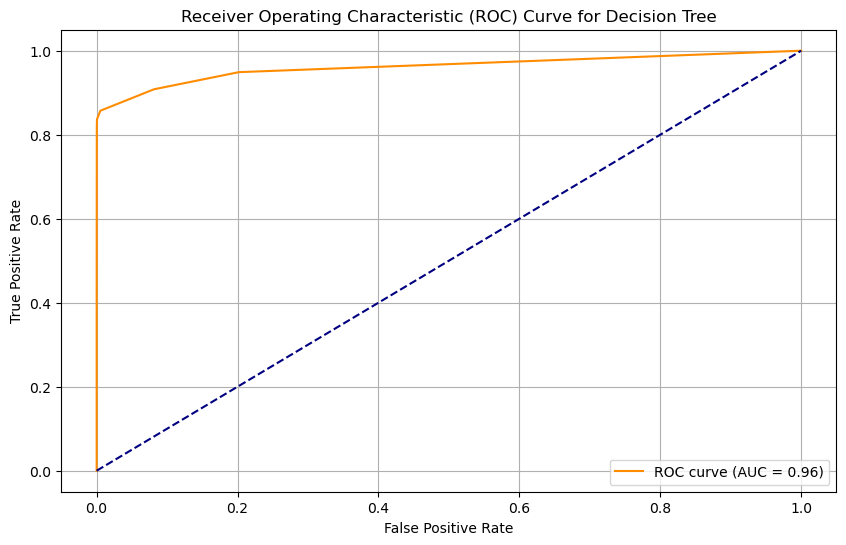

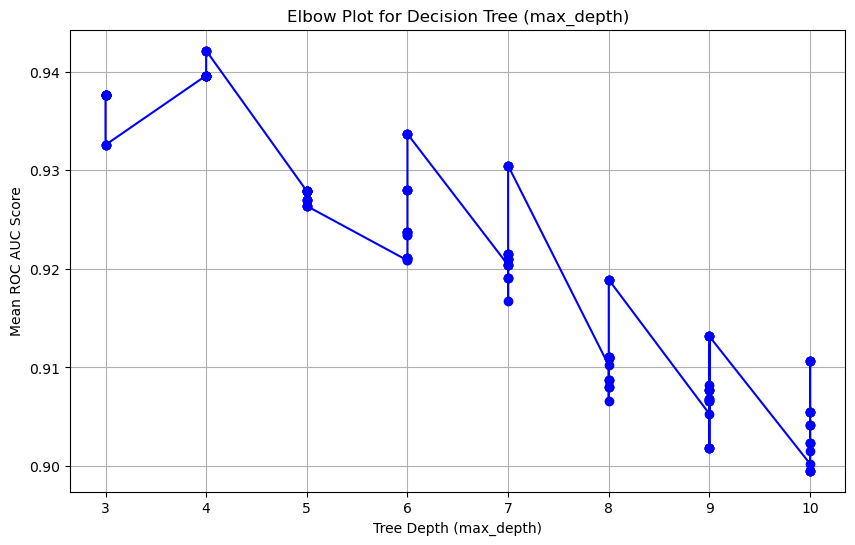

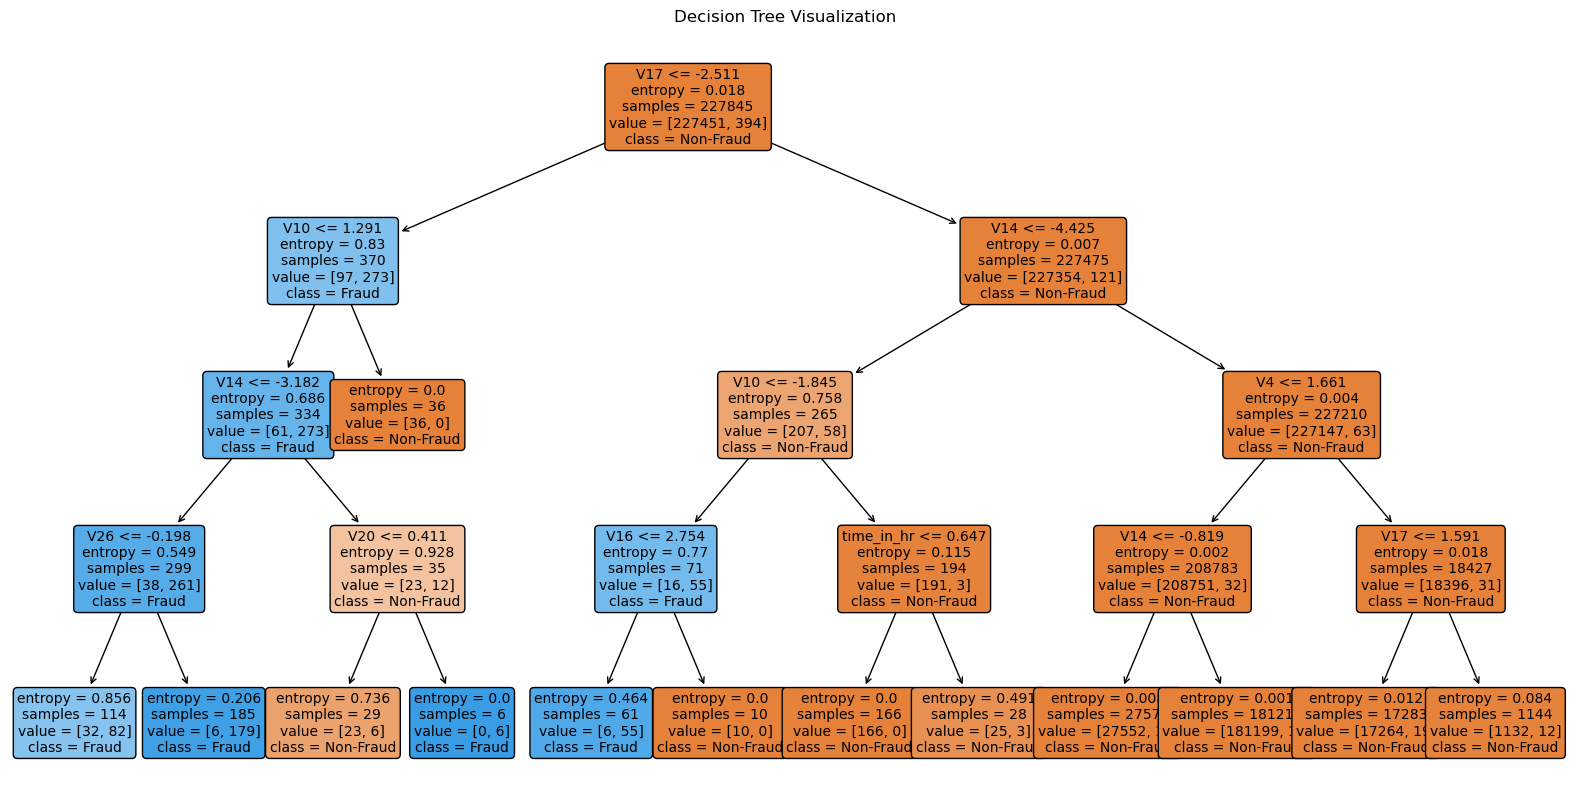

In [92]:
# Step 5: Cross-Validation
Dt_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Dt_cross_val_scores = cross_val_score(best_dt_model, DecisionTree_x, DecisionTree_y, cv=Dt_skf, scoring='roc_auc')

# Print Cross-Validation Results
print("\nCross-Validation Scores:", Dt_cross_val_scores)
print(f"Mean Cross-Validation Score: {Dt_cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Score: {Dt_cross_val_scores.std():.4f}")

# Plot Cross-Validation ROC AUC Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(Dt_cross_val_scores) + 1), Dt_cross_val_scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=Dt_cross_val_scores.mean(), color='red', linestyle='--', label='Mean ROC AUC')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('Cross-Validation ROC AUC Scores')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 6: Make predictions on the test set using the tuned model
DecisionTree_y_pred = best_dt_model.predict(DecisionTree_x_test)
DecisionTree_y_pred_prob = best_dt_model.predict_proba(DecisionTree_x_test)[:, 1]

# Step 7: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(DecisionTree_y_test, DecisionTree_y_pred))

print("\nClassification Report:")
print(classification_report(DecisionTree_y_test, DecisionTree_y_pred))

# Calculate additional metrics
accuracy = accuracy_score(DecisionTree_y_test, DecisionTree_y_pred)
recall = recall_score(DecisionTree_y_test, DecisionTree_y_pred)
precision = precision_score(DecisionTree_y_test, DecisionTree_y_pred)
f1 = f1_score(DecisionTree_y_test, DecisionTree_y_pred)
roc_auc = roc_auc_score(DecisionTree_y_test, DecisionTree_y_pred_prob)

print("\nAccuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Testing Error
test_error = 1 - accuracy
print("Testing error:", test_error)

# Step 8: Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(DecisionTree_y_test, DecisionTree_y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Step 9: Elbow Plot for `max_depth`
results = grid_search_imbalanced.cv_results_
depth_values = [param['max_depth'] for param in results['params']]
roc_auc_scores = results['mean_test_score']

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, roc_auc_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Elbow Plot for Decision Tree (max_depth)')
plt.grid(True)
plt.show()

# Step 10: Visualize the Best Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=DecisionTree_x.columns,
    class_names=["Non-Fraud", "Fraud"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

𝟑𝐛. 𝐒𝐌𝐎𝐓𝐄 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [95]:
# Step 1: Prepare your dataset
DecisionTree_x = X_train_smote
DecisionTree_y = y_train_smote

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    DecisionTree_x, DecisionTree_y, test_size=0.2, random_state=42, stratify=DecisionTree_y
)

# Step 3: Define the pipeline with SMOTE and Decision Tree Classifier
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Step 4: Define the parameter grid for GridSearchCV
param_grid = {
    'dt__max_depth': [3, 5, 7],                 # Depth of the tree
    'dt__min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'dt__min_samples_leaf': [1, 2, 4],          # Minimum samples at a leaf node
    'dt__criterion': ['entropy']        # Split criterion
}

# Step 5: Perform hyperparameter tuning using GridSearchCV with the pipeline
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['entropy'],
                         'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)


Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}

Confusion Matrix:
[[45076   415]
 [  769  8329]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     45491
           1       0.95      0.92      0.93      9098

    accuracy                           0.98     54589
   macro avg       0.97      0.95      0.96     54589
weighted avg       0.98      0.98      0.98     54589


Accuracy Score: 0.978310648665482
Recall Score: 0.9154759287755551
Precision Score: 0.9525388838060385
F1 Score: 0.9336397264880619
ROC AUC Score: 0.9940626881914258
Testing error: 0.021689351334517992

Cross-Validation Scores: [0.9943118  0.99402912 0.99441232 0.99369627 0.99389047]
Mean Cross-Validation Score: 0.9941
Standard Deviation of Cross-Validation Score: 0.0003


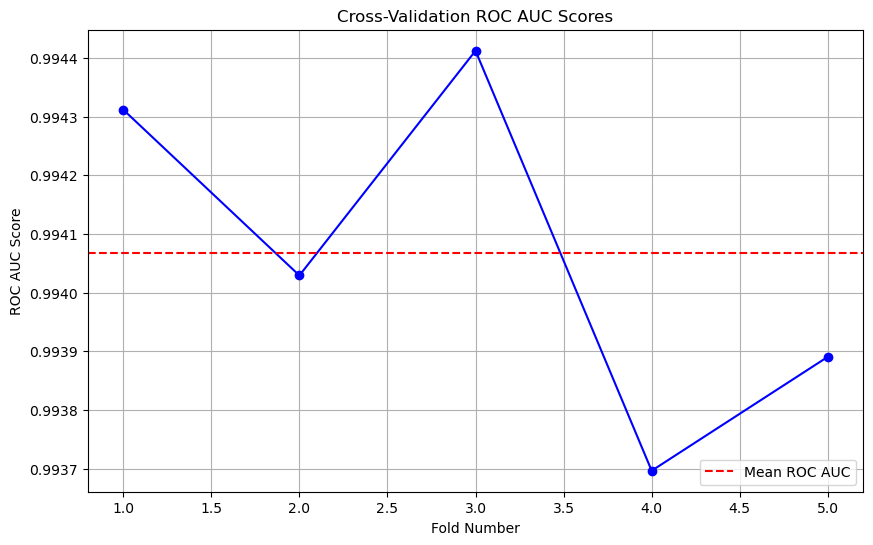

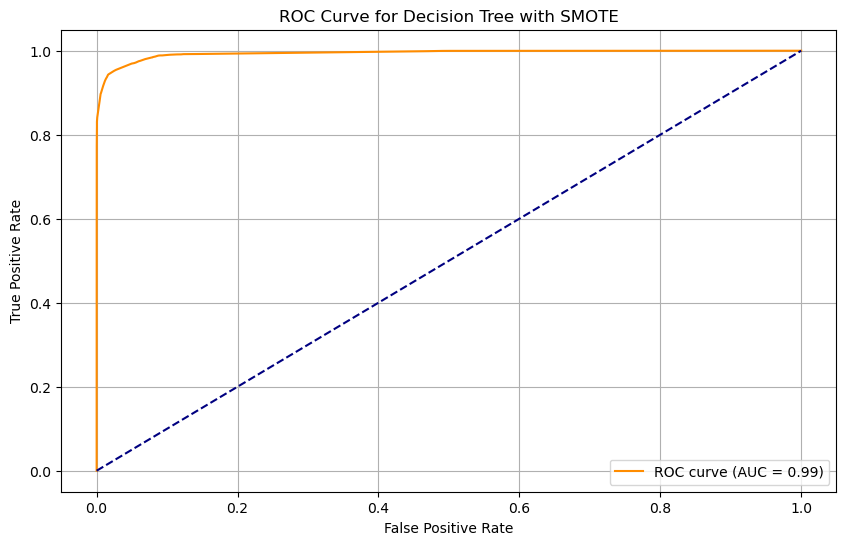

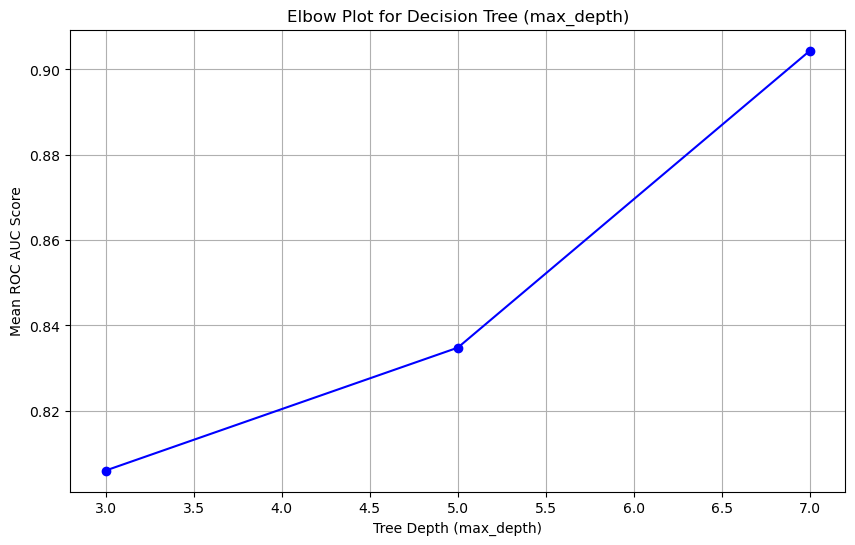

In [96]:
# Step 6: Get the best model and parameters
best_pipeline = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Step 7: Make predictions on the original test set (not the resampled one)
y_pred = best_pipeline.predict(X_test)
y_pred_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Step 8: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nAccuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

test_error = 1 - accuracy
print("Testing error:", test_error)

# Step 9: Cross-Validation
Dt_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Dt_cross_val_scores = cross_val_score(best_pipeline, DecisionTree_x, DecisionTree_y, cv=Dt_skf, scoring='roc_auc')

print("\nCross-Validation Scores:", Dt_cross_val_scores)
print(f"Mean Cross-Validation Score: {Dt_cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Score: {Dt_cross_val_scores.std():.4f}")

# Plotting Cross-Validation ROC AUC Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(Dt_cross_val_scores) + 1), Dt_cross_val_scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=Dt_cross_val_scores.mean(), color='red', linestyle='--', label='Mean ROC AUC')
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('Cross-Validation ROC AUC Scores')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 10: Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree with SMOTE')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 11: Elbow Plot for `max_depth`
results = grid_search.cv_results_
depth_values = [param['dt__max_depth'] for param in results['params']]
roc_auc_scores = results['mean_test_score']

# Averaging ROC AUC scores for each depth
depth_roc_auc = {}
for depth, score in zip(depth_values, roc_auc_scores):
    if depth not in depth_roc_auc:
        depth_roc_auc[depth] = []
    depth_roc_auc[depth].append(score)

avg_depth_scores = {k: np.mean(v) for k, v in depth_roc_auc.items()}

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(list(avg_depth_scores.keys()), list(avg_depth_scores.values()), marker='o', linestyle='-', color='blue')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Elbow Plot for Decision Tree (max_depth)')
plt.grid(True)


                                                                                            𝐂𝐨𝐦𝐩𝐚𝐫𝐢𝐧𝐠 𝐌𝐨𝐝𝐞𝐥𝐬

𝐂𝐨𝐦𝐩𝐚𝐫𝐢𝐧𝐠 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐌𝐨𝐝𝐞𝐥𝐬

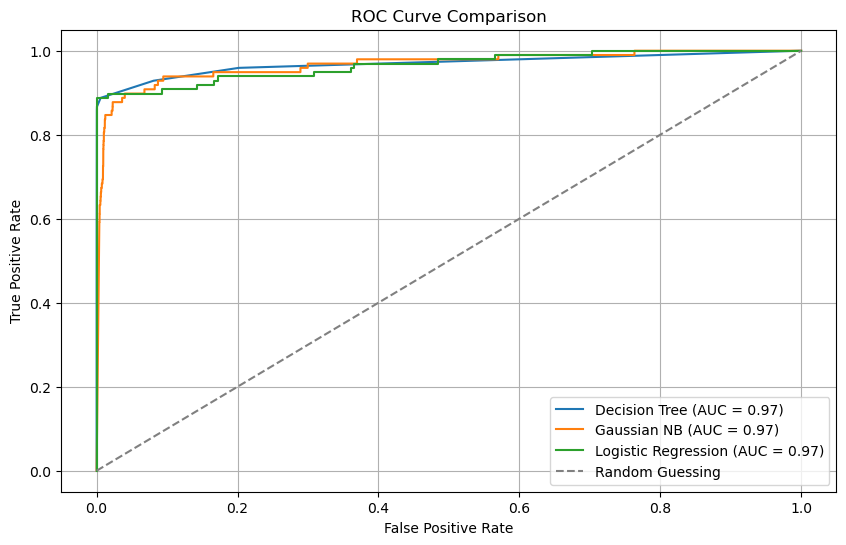


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Decision Tree  0.999491   0.848485  0.857143  0.852792  0.969292
1          Gaussian NB  0.990064   0.121359  0.765306  0.209497  0.966858
2  Logistic Regression  0.999140   0.826667  0.632653  0.716763  0.965341


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Models dictionary: Replace placeholders with your trained models
models = {
    "Decision Tree": best_dt_model,          # Your trained Decision Tree model
    "Gaussian NB": gnb_best,                # Your trained Gaussian NB model
    "Logistic Regression": best_log_reg     # Your trained Logistic Regression model
}

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    """Evaluate a model and return key metrics."""
    y_pred = model.predict(X_test)  # Predict class labels
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Predict probabilities if supported

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    return accuracy, precision, recall, f1, roc_auc, y_pred_prob

# Define your test data
X = credit_card_data.drop(columns=["Class", "Amount Range"])  # Replace with your actual test features
y = credit_card_data["Class"]  # Replace with your actual test labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Evaluate each model and store results
results = []
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Evaluate the model
    accuracy, precision, recall, f1, roc_auc, y_pred_prob = evaluate_model(model, X_test, y_test)
    
    # Store metrics in results list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })
    
    # Step 2: Plot ROC Curve if the model supports probability predictions
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


𝐂𝐨𝐦𝐩𝐚𝐫𝐢𝐧𝐠 𝐒𝐌𝐎𝐓𝐄 𝐌𝐨𝐝𝐞𝐥𝐬

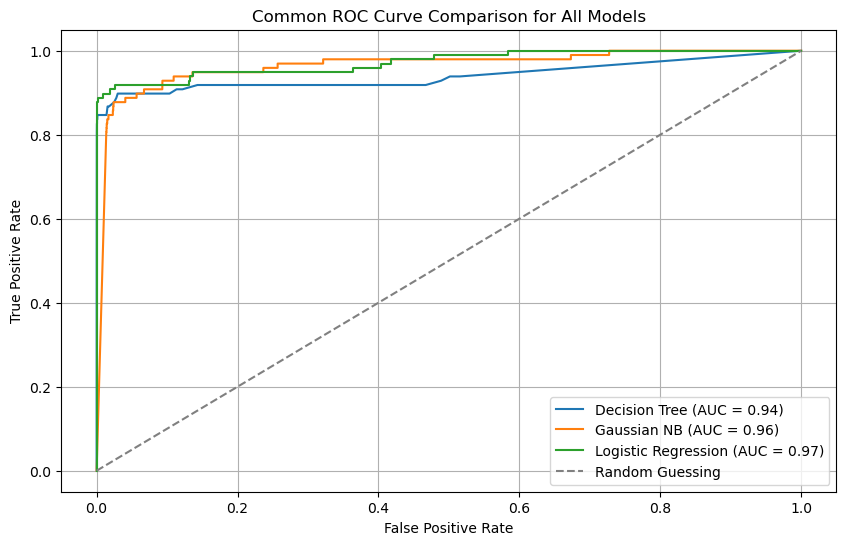


Model Comparison at Optimal Thresholds:
                 Model  Optimal Threshold  Accuracy  Precision    Recall  \
0        Decision Tree           0.998976  0.999438   0.858696  0.806122   
1          Gaussian NB           1.000000  0.985991   0.092075  0.806122   
2  Logistic Regression           0.997951  0.999350   0.808081  0.816327   

   F1 Score   ROC AUC  
0  0.831579  0.940047  
1  0.165272  0.964449  
2  0.812183  0.972254  


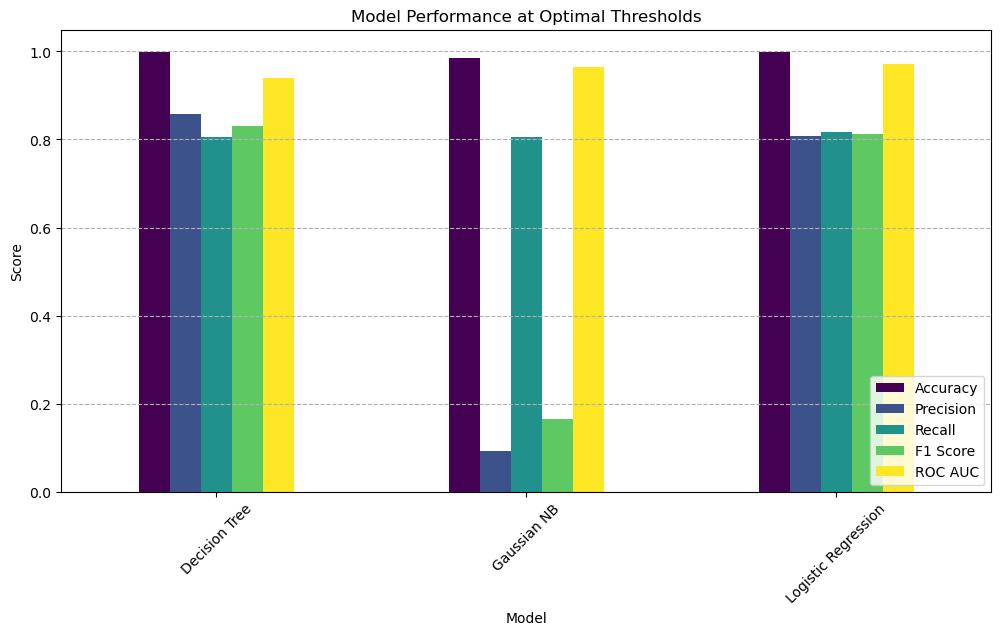

In [128]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, precision_recall_curve, classification_report
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define your trained models in a dictionary
models = {
    "Decision Tree": best_pipeline,
    "Gaussian NB": best_pipeline_GNB,
    "Logistic Regression": best_pipeline_log
}

def evaluate_model(model, X_test, y_test, threshold=0.5):
    """Evaluate a model and return key metrics."""
    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Adjust predictions based on the threshold
    if y_pred_prob is not None:
        y_pred = (y_pred_prob >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, confusion, y_pred_prob

# Define dataset and split into training and test sets
X = credit_card_data.drop(columns=["Amount Range", "Class"])  # Features
y = credit_card_data["Class"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 1: Find Optimal Thresholds and Evaluate Models
optimal_results = []
plt.figure(figsize=(10, 6))  # Initialize the common ROC AUC Curve plot

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        # Predict probabilities
        y_pred_prob = model.predict_proba(X_test)[:, 1]

        # Precision-Recall Curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

        # Calculate F1 Scores for Precision-Recall Tradeoff
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Avoid division by zero
        optimal_idx = np.argmax(f1_scores)  # Index of the best F1 score
        optimal_threshold = thresholds[optimal_idx]

        # Evaluate model at the optimal threshold
        y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_optimal)
        precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=1)
        recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=1)
        f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=1)
        roc_auc = roc_auc_score(y_test, y_pred_prob)

        # Store results
        optimal_results.append({
            "Model": name,
            "Optimal Threshold": optimal_threshold,
            "Accuracy": accuracy,
            "Precision": precision_optimal,
            "Recall": recall_optimal,
            "F1 Score": f1_optimal,
            "ROC AUC": roc_auc
        })

        # Plot the ROC Curve for the common plot
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize the common ROC Curve plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Common ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 2: Convert Optimal Results to a DataFrame
optimal_results_df = pd.DataFrame(optimal_results)

# Step 3: Print and Compare Models at Optimal Thresholds
print("\nModel Comparison at Optimal Thresholds:")
print(optimal_results_df)

# Step 4: Visualize Comparison
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
optimal_results_df.set_index("Model")[metrics_to_plot].plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Model Performance at Optimal Thresholds")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--")
plt.show()


𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐯𝐬. 𝐑𝐞𝐜𝐚𝐥𝐥 𝐓𝐫𝐚𝐝𝐞𝐨𝐟𝐟 𝐢𝐧 𝐂𝐫𝐞𝐝𝐢𝐭 𝐂𝐚𝐫𝐝 𝐅𝐫𝐚𝐮𝐝 𝐃𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧

In credit card fraud detection, the ROC-AUC curve is generally not the primary evaluation metric. Instead, we prioritize either recall or precision based on the problem's objective. Achieving both high precision and high recall simultaneously is highly challenging due to the extreme class imbalance inherent in fraud detection tasks.

𝐔𝐧𝐝𝐞𝐫𝐬𝐭𝐚𝐧𝐝𝐢𝐧𝐠 𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐚𝐧𝐝 𝐑𝐞𝐜𝐚𝐥𝐥
𝐑𝐞𝐜𝐚𝐥𝐥 (𝐒𝐞𝐧𝐬𝐢𝐭𝐢𝐯𝐢𝐭𝐲):
The ability to correctly identify fraud cases and avoid marking them as non-fraud.
Importance: In fraud detection, missing a fraud case can have severe financial and reputational consequences.
Goal: Maximize recall to ensure that as many fraudulent transactions as possible are identified, even at the cost of some False Positives.

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧:
The proportion of transactions predicted as fraud that are actually fraudulent.
Tradeoff: While high precision ensures that flagged fraud cases are legitimate, it often comes at the expense of low recall, as the model becomes overly conservative.
The Tradeoff Between Precision and Recall
Achieving both high precision and high recall with conventional machine learning models is impractical for the following reasons:

𝐂𝐥𝐚𝐬𝐬 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞: 
Fraud cases are extremely rare (e.g., 0.1% of transactions). Most models are biased toward predicting the majority class (non-fraud).
Nature of Fraud: Fraud patterns are complex, dynamic, and constantly evolving, making detection challenging with traditional methods.
Parameter Tuning Limitations: Even with extensive parameter tuning, conventional models struggle to balance precision and recall without overfitting.
To address these challenges, we prioritize high recall at the cost of lower precision because:

𝐅𝐚𝐥𝐬𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐦𝐢𝐬𝐬𝐞𝐝 𝐟𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬):
Marking a fraud case as non-fraud is far worse as it can lead to financial losses, security breaches, and reputational damage.
𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐧𝐨𝐧-𝐟𝐫𝐚𝐮𝐝 𝐦𝐚𝐫𝐤𝐞𝐝 𝐚𝐬 𝐟𝐫𝐚𝐮𝐝):
While undesirable, false positives are manageable. Legitimate transactions flagged as fraud can be manually reviewed or validated.


𝐎𝐮𝐫 𝐏𝐫𝐨𝐣𝐞𝐜𝐭'𝐬 𝐎𝐛𝐣𝐞𝐜𝐭𝐢𝐯𝐞: 𝐏𝐫𝐢𝐨𝐫𝐢𝐭𝐢𝐳𝐢𝐧𝐠 𝐑𝐞𝐜𝐚𝐥𝐥 𝐈𝐧 𝐭𝐡𝐢𝐬 𝐩𝐫𝐨𝐣𝐞𝐜𝐭, 𝐰𝐞 𝐚𝐢𝐦 𝐭𝐨:

𝐌𝐚𝐱𝐢𝐦𝐢𝐳𝐞 𝐑𝐞𝐜𝐚𝐥𝐥: 
Focus on correctly identifying fraud cases to ensure vigilance and avoid missed detections.
Accept Tradeoffs in Precision: Understand that achieving very high recall may result in a higher number of false positives.
Business Perspective: In financial systems, being extra cautious is critical. Missing a fraud case (False Negative) is far costlier than flagging a legitimate transaction for review (False Positive).

Advanced Techniques
While conventional methods such as clustering, isolation forests, or Gaussian Mixture Models can improve recall, they are limited by their inability to model highly dynamic fraud patterns. Advanced methods like Neural Networks and Autoencoders provide a pathway to better results by:
Learning deep, complex, and non-linear relationships in data.
Adapting to evolving fraud patterns without extensive manual intervention.
Balancing precision and recall through robust anomaly detection mechanisms.
Conclusion
In summary, the project emphasizes recall over precision because:

Fraud Detection Priority: Identifying fraud cases (even with some false positives) is far more critical than missing them.
Financial Security: Minimizing False Negatives reduces financial risk and ensures vigilance.
Realistic Goals: Achieving high recall with traditional methods is feasible, while attaining high precision simultaneously often requires advanced solutions like neural networks.
This strategy aligns with the financial industry's principle: "Better safe than sorry."

                                                                                                 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚

In [4]:
credit_card_data = pd.read_csv('creditcard.csv')

#Printing top 5 and bottom 5
credit_card_data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 𝐍𝐮𝐥𝐥 𝐕𝐚𝐥𝐮𝐞𝐬

In [5]:
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


𝐃𝐫𝐨𝐩𝐩𝐢𝐧𝐠 𝐈𝐫𝐫𝐞𝐥𝐞𝐯𝐚𝐧𝐭 𝐅𝐞𝐚𝐭𝐮𝐫𝐞𝐬

In [6]:
features = credit_card_data.drop(columns=['Amount','Time', 'Class'], errors='ignore')

𝐒𝐜𝐚𝐥𝐢𝐧𝐠

In [7]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(features)

𝐏𝐫𝐢𝐧𝐜𝐢𝐩𝐚𝐥 𝐂𝐨𝐦𝐩𝐨𝐧𝐞𝐧𝐭 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐭𝐨 𝐜𝐡𝐞𝐜𝐤 𝐕𝐚𝐫𝐢𝐚𝐧𝐜𝐞

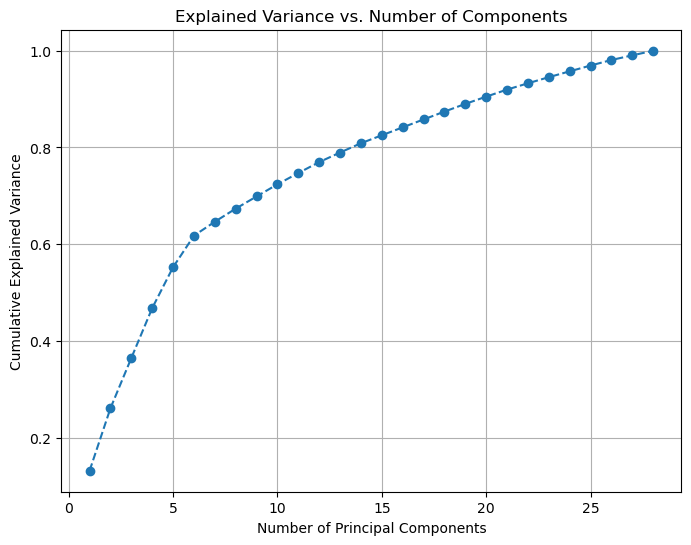

Number of components to retain 95% variance: 24


In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fit PCA to the scaled data
pca = PCA()
pca.fit(scaled_data)  # Assuming 'X_scaled' is your scaled input data

# Step 2: Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Plot the cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Step 4: Find the number of components for 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")


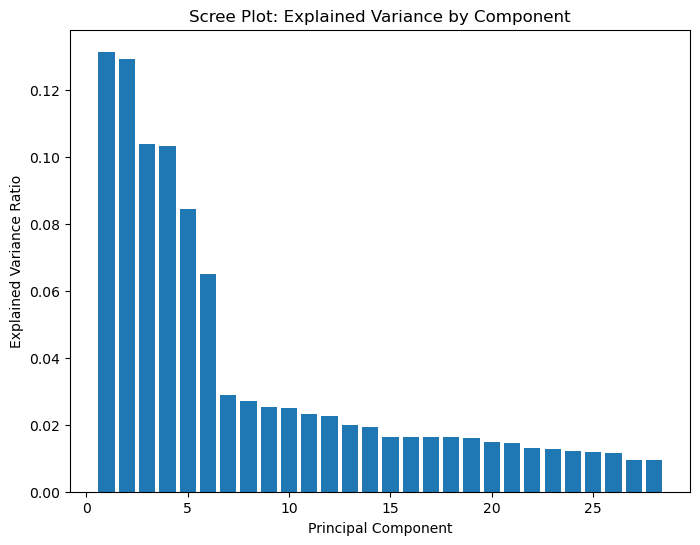

In [11]:
# Plot explained variance for each component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance by Component')
plt.show()


𝐓𝐒𝐍𝐄 𝐕𝐢𝐳𝐮𝐚𝐥𝐢𝐳𝐚𝐭𝐢𝐨𝐧

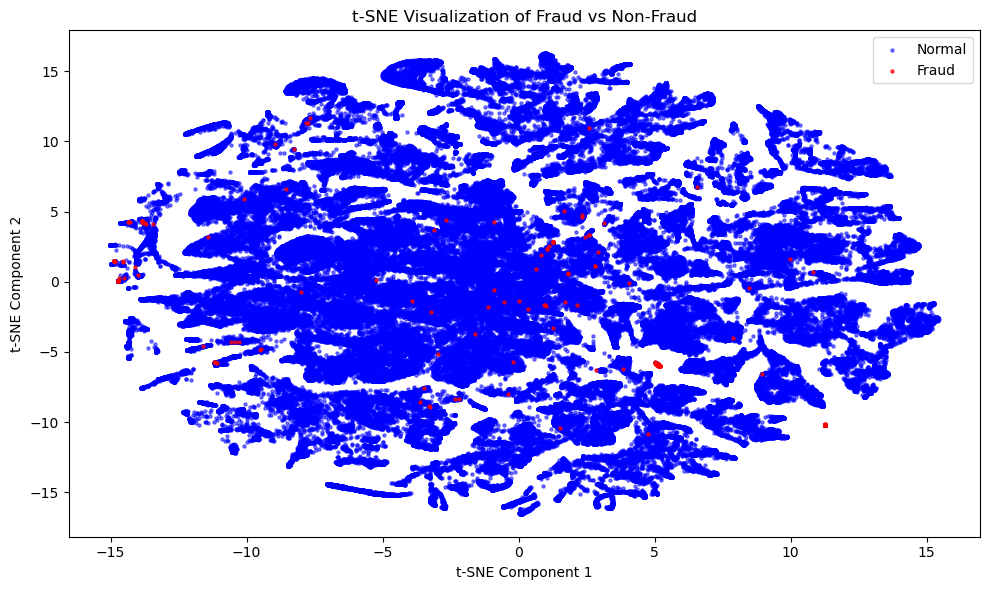

In [24]:
# Step 1: Extract features and labels
X = credit_card_data.drop(columns=['Class'])  # Features
y = credit_card_data['Class']  # Labels (0 = Normal, 1 = Fraud)

# Step 2: Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 3: Apply t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)

# Step 4: Plot Fraud vs Non-Fraud
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[y == 0, 0], tsne_results[y == 0, 1], s=5, c='blue', label='Normal', alpha=0.5)
plt.scatter(tsne_results[y == 1, 0], tsne_results[y == 1, 1], s=5, c='red', label='Fraud', alpha=0.7)
plt.title("t-SNE Visualization of Fraud vs Non-Fraud")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.tight_layout()
plt.show()


1. 𝐊𝐌𝐄𝐀𝐍𝐒 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

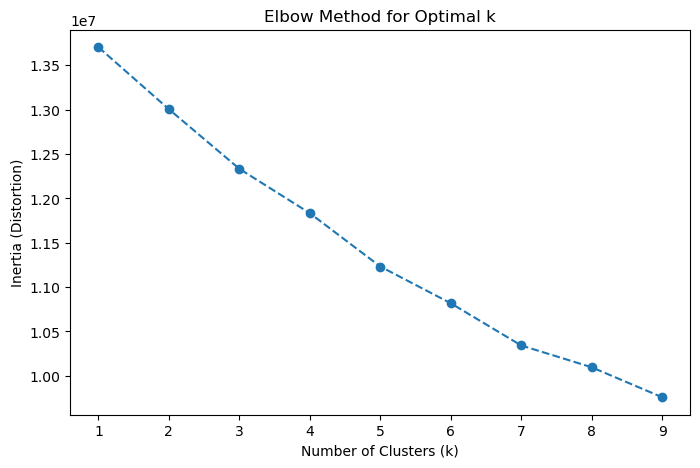

In [15]:
# Elbow Method
distortions = []
K = range(1, 10)  # Testing 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Assuming 'scaled_data' contains your scaled V1-V28 features
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.4981093346832986


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.49599468966093674


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.46730809254329997


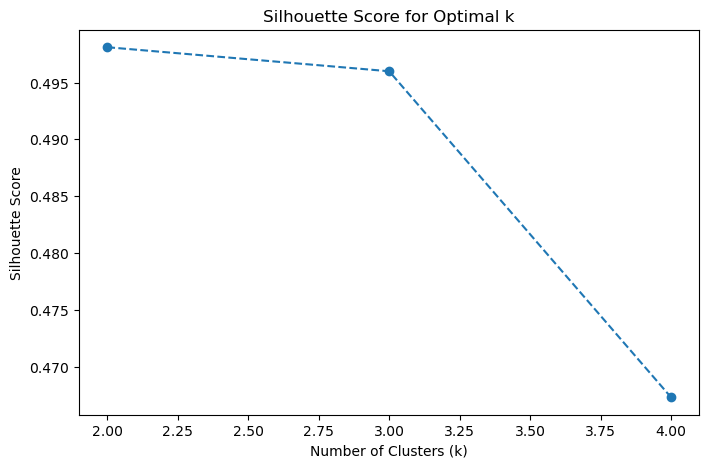

In [16]:
# Silhouette Score
silhouette_scores = []
K = range(2, 5)  # Silhouette score is not valid for k=1
sampled_data = pd.DataFrame(scaled_data).sample(frac=0.2, random_state=42)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sampled_data)
    score = silhouette_score(sampled_data, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


Training set size: 199364 rows
Test set size: 85443 rows
Cluster-to-Label Mapping (Based on Cluster Size): {0: 0, 1: 1}

Fraud cases in X_test: 148
Normal cases in X_test: 85295

K-Means Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     85295
           1       0.00      0.32      0.00       148

    accuracy                           0.54     85443
   macro avg       0.50      0.43      0.35     85443
weighted avg       1.00      0.54      0.70     85443


Confusion Matrix:
[[46041 39254]
 [  101    47]]


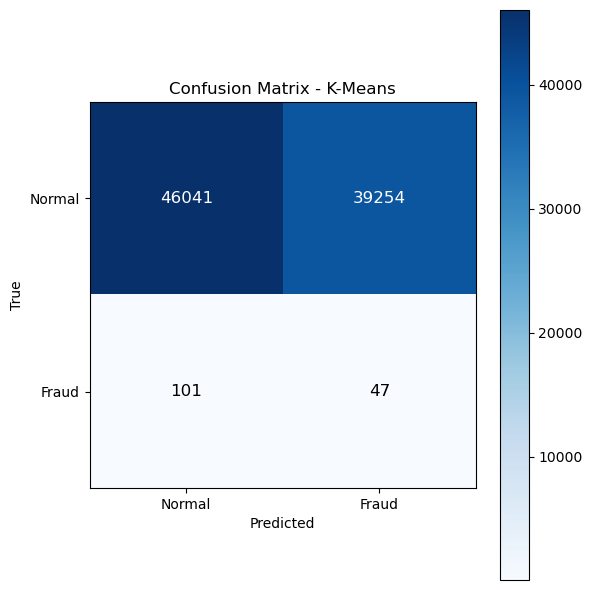

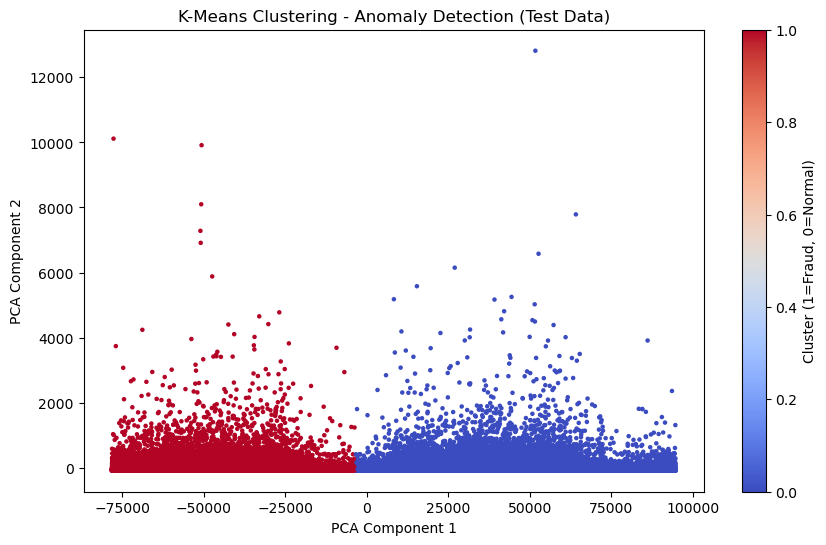

In [26]:
# Step 1: Split data into features and labels
X = credit_card_data.drop(columns=['Class'])  # Features
y = credit_card_data['Class']                # Labels (0 = Normal, 1 = Fraud)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# Step 3: Train K-Means Model
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_model.fit(X_train)

# Step 4: Align Clusters to True Labels Based on Size
cluster_sizes = [sum(kmeans_model.labels_ == i) for i in range(2)]  # Cluster sizes
fraud_cluster = np.argmin(cluster_sizes)  # Smaller cluster = Fraud
normal_cluster = np.argmax(cluster_sizes)  # Larger cluster = Normal

# Map clusters manually
cluster_to_label = {normal_cluster: 0, fraud_cluster: 1}
print("Cluster-to-Label Mapping (Based on Cluster Size):", cluster_to_label)

# Step 4.1: Print Fraud and Non-Fraud Counts in X_test
fraud_count = np.sum(y_test == 1)    # Count fraud cases
normal_count = np.sum(y_test == 0)   # Count normal cases

print(f"\nFraud cases in X_test: {fraud_count}")
print(f"Normal cases in X_test: {normal_count}")

# Step 5: Predict Clusters on Test Data and Map to Labels
kmeans_preds = kmeans_model.predict(X_test)
kmeans_preds_mapped = np.array([cluster_to_label[label] for label in kmeans_preds])

# Step 6: Evaluate the Model
print("\nK-Means Results:")
print("\nClassification Report:")
print(classification_report(y_test, kmeans_preds_mapped))

# Confusion Matrix
cm = confusion_matrix(y_test, kmeans_preds_mapped)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Plot Confusion Matrix Using Matplotlib
classes = ['Normal', 'Fraud']

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix - K-Means")
plt.colorbar()

plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="black" if cm[i, j] < cm.max() / 2 else "white",
                 fontsize=12)

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Step 8: Visualization of Clusters using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_preds_mapped, cmap='coolwarm', s=5)
plt.title("K-Means Clustering - Anomaly Detection (Test Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster (1=Fraud, 0=Normal)")
plt.show()

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧-𝐑𝐞𝐜𝐚𝐥𝐥 𝐓𝐫𝐚𝐝𝐞𝐨𝐟𝐟

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐟𝐨𝐫 𝐂𝐥𝐚𝐬𝐬 𝟏 (𝐅𝐫𝐚𝐮𝐝): 𝟎.𝟎𝟎 𝐕𝐞𝐫𝐲 𝐩𝐨𝐨𝐫 𝐩𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧; 𝐦𝐚𝐧𝐲 𝐜𝐚𝐬𝐞𝐬 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝 𝐚𝐫𝐞 𝐧𝐨𝐭 𝐚𝐜𝐭𝐮𝐚𝐥 𝐟𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬. 

𝐑𝐞𝐜𝐚𝐥𝐥 𝐟𝐨𝐫 𝐂𝐥𝐚𝐬𝐬 𝟏 (𝐅𝐫𝐚𝐮𝐝): 𝟎.𝟑𝟐 𝐎𝐧𝐥𝐲 𝟑𝟐% 𝐨𝐟 𝐚𝐜𝐭𝐮𝐚𝐥 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐚𝐫𝐞 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐝𝐞𝐭𝐞𝐜𝐭𝐞𝐝. 


𝐓𝐫𝐮𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐓𝐏): 𝟒𝟕 (𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝).  

𝐅𝐚𝐥𝐬𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐅𝐍): 𝟏𝟎𝟏 (𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥).  

𝐓𝐫𝐮𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐓𝐍): 𝟒𝟔𝟎𝟒𝟏 (𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥).  

𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐅𝐏): 𝟑𝟗𝟐𝟓𝟒 (𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝).  

𝐊𝐞𝐲 𝐎𝐛𝐬𝐞𝐫𝐯𝐚𝐭𝐢𝐨𝐧𝐬  

𝐇𝐢𝐠𝐡 𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬:  𝐀 𝐬𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐭 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 (𝟑𝟗𝟐𝟓𝟒) 𝐚𝐫𝐞 𝐛𝐞𝐢𝐧𝐠 𝐦𝐢𝐬𝐜𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝. 𝐓𝐡𝐢𝐬 𝐬𝐮𝐠𝐠𝐞𝐬𝐭𝐬 𝐭𝐡𝐚𝐭 𝐊-𝐌𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐬𝐭𝐫𝐮𝐠𝐠𝐥𝐞𝐬 𝐭𝐨 𝐝𝐢𝐬𝐭𝐢𝐧𝐠𝐮𝐢𝐬𝐡 𝐛𝐞𝐭𝐰𝐞𝐞𝐧 𝐭𝐡𝐞 𝐭𝐰𝐨 𝐜𝐥𝐚𝐬𝐬𝐞𝐬 𝐞𝐟𝐟𝐞𝐜𝐭𝐢𝐯𝐞𝐥𝐲.  

𝐋𝐨𝐰 𝐑𝐞𝐜𝐚𝐥𝐥 𝐟𝐨𝐫 𝐅𝐫𝐚𝐮𝐝:  𝐎𝐧𝐥𝐲 𝟒𝟕 𝐨𝐮𝐭 𝐨𝐟 𝟏𝟒𝟖 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐚𝐫𝐞 𝐢𝐝𝐞𝐧𝐭𝐢𝐟𝐢𝐞𝐝, 𝐥𝐞𝐚𝐝𝐢𝐧𝐠 𝐭𝐨 𝐚 𝐫𝐞𝐜𝐚𝐥𝐥 𝐨𝐟 𝟑𝟐%. 𝐓𝐡𝐢𝐬 𝐢𝐬 𝐚 𝐦𝐚𝐣𝐨𝐫 𝐥𝐢𝐦𝐢𝐭𝐚𝐭𝐢𝐨𝐧 𝐟𝐨𝐫 𝐚 𝐟𝐫𝐚𝐮𝐝 𝐝𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧 𝐦𝐨𝐝𝐞𝐥 𝐰𝐡𝐞𝐫𝐞 𝐡𝐢𝐠𝐡 𝐫𝐞𝐜𝐚𝐥𝐥 𝐢𝐬 𝐜𝐫𝐢𝐭𝐢𝐜𝐚𝐥.  

𝐂𝐥𝐚𝐬𝐬 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞 𝐈𝐦𝐩𝐚𝐜𝐭:  𝐓𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐢𝐬 𝐡𝐢𝐠𝐡𝐥𝐲 𝐢𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 (𝟖𝟓𝟐𝟗𝟓 𝐍𝐨𝐫𝐦𝐚𝐥 𝐯𝐬. 𝟏𝟒𝟖 𝐅𝐫𝐚𝐮𝐝), 𝐜𝐚𝐮𝐬𝐢𝐧𝐠 𝐊-𝐌𝐞𝐚𝐧𝐬 𝐭𝐨 𝐟𝐨𝐜𝐮𝐬 𝐦𝐨𝐫𝐞 𝐨𝐧 𝐭𝐡𝐞 𝐦𝐚𝐣𝐨𝐫𝐢𝐭𝐲 𝐜𝐥𝐚𝐬𝐬 (𝐍𝐨𝐫𝐦𝐚𝐥) 𝐚𝐧𝐝 𝐩𝐨𝐨𝐫𝐥𝐲 𝐝𝐞𝐭𝐞𝐜𝐭 𝐭𝐡𝐞 𝐦𝐢𝐧𝐨𝐫𝐢𝐭𝐲 𝐜𝐥𝐚𝐬𝐬 (𝐅𝐫𝐚𝐮𝐝).

𝐆𝐚𝐮𝐬𝐬𝐢𝐚𝐧 𝐌𝐢𝐱𝐭𝐮𝐫𝐞 𝐌𝐨𝐝𝐞𝐥

Training set size: 199364 rows
Test set size: 85443 rows

Fraud cases in X_test: 148
Normal cases in X_test: 85295

GMM Results (n_components=5):

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.80      0.05       148

    accuracy                           0.95     85443
   macro avg       0.51      0.88      0.52     85443
weighted avg       1.00      0.95      0.97     85443


Confusion Matrix:
[[81266  4029]
 [   30   118]]


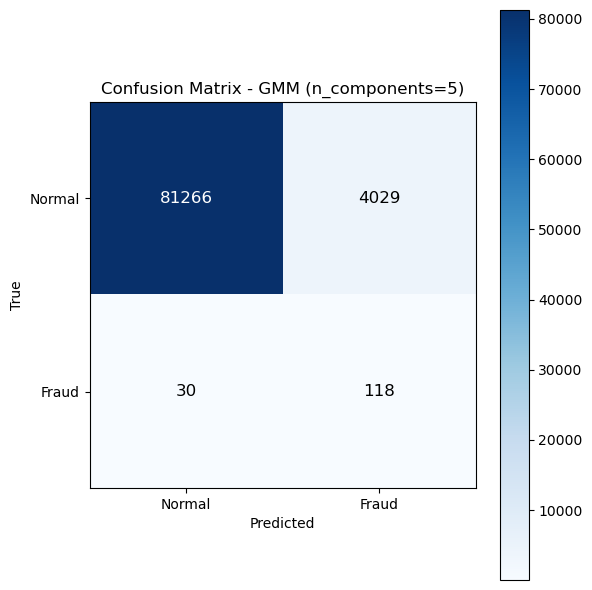

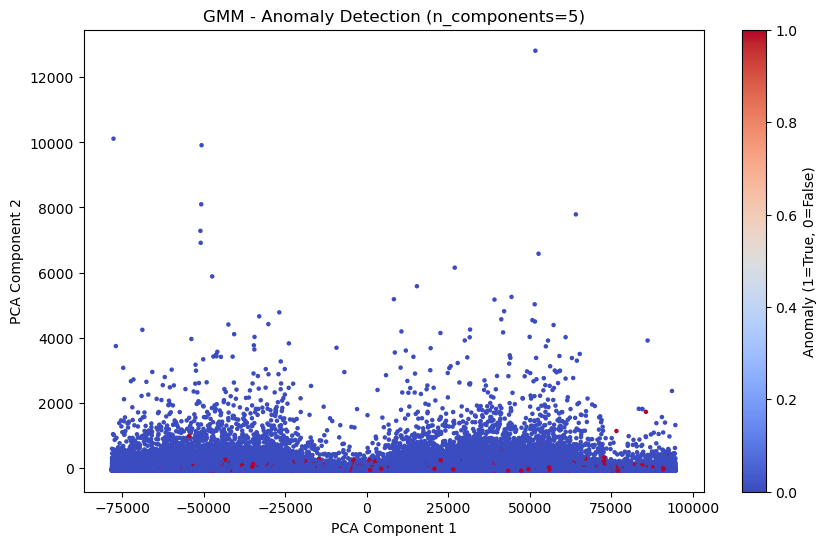

In [28]:
# Step 1: Split data into features and labels
X = credit_card_data.drop(columns=['Class'])  # Features
y = credit_card_data['Class']                # Labels (0 = Normal, 1 = Fraud)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# Step 3: Train Gaussian Mixture Model with n_components=5
gmm = GaussianMixture(n_components=5, init_params='kmeans', covariance_type='full', random_state=42)
gmm.fit(X_train)

# Step 4: Predict Clusters on Test Data
gmm_preds = gmm.predict(X_test)

# Step 5: Map Clusters to Labels
# Identify the cluster with the smallest number of samples as fraud
cluster_sizes = np.bincount(gmm_preds)
fraud_cluster = np.argmin(cluster_sizes)  # Smallest cluster -> Fraud
normal_clusters = [i for i in range(5) if i != fraud_cluster]

# Map clusters manually
cluster_to_label = {fraud_cluster: 1}  # Fraud
for cluster in normal_clusters:
    cluster_to_label[cluster] = 0  # Normal

# Convert predictions to match fraud detection convention
gmm_preds_mapped = np.array([cluster_to_label[label] for label in gmm_preds])

# Step 4.1: Print Fraud and Non-Fraud Counts in X_test
fraud_count = np.sum(y_test == 1)    # Count fraud cases
normal_count = np.sum(y_test == 0)   # Count normal cases

print(f"\nFraud cases in X_test: {fraud_count}")
print(f"Normal cases in X_test: {normal_count}")


# Step 6: Evaluate the Model
print("\nGMM Results (n_components=5):")
print("\nClassification Report:")
print(classification_report(y_test, gmm_preds_mapped))

# Confusion Matrix
cm = confusion_matrix(y_test, gmm_preds_mapped)
print("\nConfusion Matrix:")
print(cm)

# Step 7: Plot Confusion Matrix Using Matplotlib
classes = ['Normal', 'Fraud']

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix - GMM (n_components=5)")
plt.colorbar()

plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

# Annotate Confusion Matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="black" if cm[i, j] < cm.max() / 2 else "white",
                 fontsize=12)

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Step 8: Visualization of Clusters using PCA
pca = PCA(n_components=2)  # Reduce features to 2 components for visualization
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=gmm_preds_mapped, cmap='coolwarm', s=5)
plt.title("GMM - Anomaly Detection (n_components=5)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Anomaly (1=True, 0=False)")
plt.show()


𝐓𝐫𝐮𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐓𝐏): 𝟏𝟏𝟖 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝. 𝐅𝐚𝐥𝐬𝐞 

𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐅𝐍): 𝟑𝟎 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥. 

𝐓𝐫𝐮𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐓𝐍): 𝟖𝟏𝟐𝟔𝟔 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥. 

𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐅𝐏): 𝟒𝟎𝟐𝟗 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝.


𝐇𝐢𝐠𝐡 𝐑𝐞𝐜𝐚𝐥𝐥 𝐟𝐨𝐫 𝐅𝐫𝐚𝐮𝐝 𝐂𝐚𝐬𝐞𝐬:  𝟖𝟎% 𝐫𝐞𝐜𝐚𝐥𝐥 𝐢𝐧𝐝𝐢𝐜𝐚𝐭𝐞𝐬 𝐭𝐡𝐚𝐭 𝟏𝟏𝟖 𝐨𝐮𝐭 𝐨𝐟 𝟏𝟒𝟖 𝐚𝐜𝐭𝐮𝐚𝐥 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐰𝐞𝐫𝐞 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐢𝐝𝐞𝐧𝐭𝐢𝐟𝐢𝐞𝐝. 𝐓𝐡𝐢𝐬 𝐢𝐬 𝐚 𝐦𝐚𝐣𝐨𝐫 𝐢𝐦𝐩𝐫𝐨𝐯𝐞𝐦𝐞𝐧𝐭 𝐟𝐨𝐫 𝐚 𝐟𝐫𝐚𝐮𝐝 𝐝𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧 𝐦𝐨𝐝𝐞𝐥 𝐰𝐡𝐞𝐫𝐞 𝐜𝐚𝐩𝐭𝐮𝐫𝐢𝐧𝐠 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 (𝐑𝐞𝐜𝐚𝐥𝐥) 𝐢𝐬 𝐜𝐫𝐢𝐭𝐢𝐜𝐚𝐥. 𝐇𝐢𝐠𝐡 𝐅𝐚𝐥𝐬𝐞 

𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬:  𝟒𝟎𝟐𝟗 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐰𝐞𝐫𝐞 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝. 𝐓𝐡𝐢𝐬 𝐥𝐨𝐰𝐞𝐫𝐬 𝐭𝐡𝐞 𝐩𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐚𝐧𝐝 𝐦𝐚𝐲 𝐜𝐚𝐮𝐬𝐞 𝐮𝐧𝐧𝐞𝐜𝐞𝐬𝐬𝐚𝐫𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐢𝐠𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐥𝐞𝐠𝐢𝐭𝐢𝐦𝐚𝐭𝐞 𝐭𝐫𝐚𝐧𝐬𝐚𝐜𝐭𝐢𝐨𝐧𝐬. 

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐂𝐡𝐚𝐥𝐥𝐞𝐧𝐠𝐞𝐬:  𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐢𝐬 𝐯𝐞𝐫𝐲 𝐥𝐨𝐰 (𝟎.𝟎𝟑), 𝐦𝐞𝐚𝐧𝐢𝐧𝐠 𝐚 𝐥𝐚𝐫𝐠𝐞 𝐩𝐨𝐫𝐭𝐢𝐨𝐧 𝐨𝐟 𝐭𝐡𝐞 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐚𝐫𝐞 𝐧𝐨𝐭 𝐚𝐜𝐭𝐮𝐚𝐥 𝐅𝐫𝐚𝐮𝐝. 

𝐂𝐥𝐚𝐬𝐬 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞 𝐈𝐦𝐩𝐚𝐜𝐭:  𝐓𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐫𝐞𝐦𝐚𝐢𝐧𝐬 𝐡𝐢𝐠𝐡𝐥𝐲 𝐢𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 (𝟖𝟓𝟐𝟗𝟓 𝐍𝐨𝐫𝐦𝐚𝐥 𝐯𝐬. 𝟏𝟒𝟖 𝐅𝐫𝐚𝐮𝐝). 

𝐆𝐌𝐌 𝐰𝐢𝐭𝐡 𝟓 𝐜𝐨𝐦𝐩𝐨𝐧𝐞𝐧𝐭𝐬 𝐟𝐨𝐜𝐮𝐬𝐞𝐬 𝐦𝐨𝐫𝐞 𝐨𝐧 𝐝𝐞𝐭𝐞𝐜𝐭𝐢𝐧𝐠 𝐭𝐡𝐞 𝐦𝐢𝐧𝐨𝐫𝐢𝐭𝐲 𝐜𝐥𝐚𝐬𝐬 (𝐅𝐫𝐚𝐮𝐝) 𝐛𝐮𝐭 𝐬𝐭𝐢𝐥𝐥 𝐬𝐭𝐫𝐮𝐠𝐠𝐥𝐞𝐬 𝐰𝐢𝐭𝐡 𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬.


𝐓𝐡𝐞 𝐆𝐌𝐌 𝐦𝐨𝐝𝐞𝐥 𝐰𝐢𝐭𝐡 𝟓 𝐜𝐨𝐦𝐩𝐨𝐧𝐞𝐧𝐭𝐬 𝐝𝐞𝐦𝐨𝐧𝐬𝐭𝐫𝐚𝐭𝐞𝐬 𝐚 𝐭𝐫𝐚𝐝𝐞𝐨𝐟𝐟 𝐛𝐞𝐭𝐰𝐞𝐞𝐧 𝐑𝐞𝐜𝐚𝐥𝐥 𝐚𝐧𝐝 𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧:  

𝐇𝐢𝐠𝐡 𝐑𝐞𝐜𝐚𝐥𝐥 (𝟎.𝟖𝟎): 𝐂𝐚𝐩𝐭𝐮𝐫𝐞𝐬 𝐦𝐨𝐬𝐭 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬. 

𝐋𝐨𝐰 𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 (𝟎.𝟎𝟑): 𝐌𝐚𝐧𝐲 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐚𝐫𝐞 𝐦𝐢𝐬𝐜𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝.

𝐈𝐬𝐨𝐥𝐚𝐭𝐢𝐨𝐧 𝐅𝐨𝐫𝐞𝐬𝐭

Training set size: 199364 rows
Test set size: 85443 rows


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Fraud cases in X_test: 148
Normal cases in X_test: 85295

Isolation Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.70      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.84      0.55     85443
weighted avg       1.00      0.98      0.99     85443


Confusion Matrix:
[[83667  1628]
 [   45   103]]


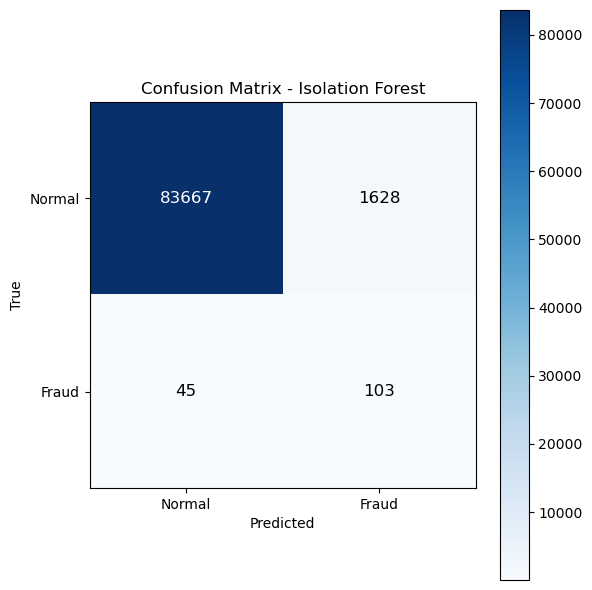

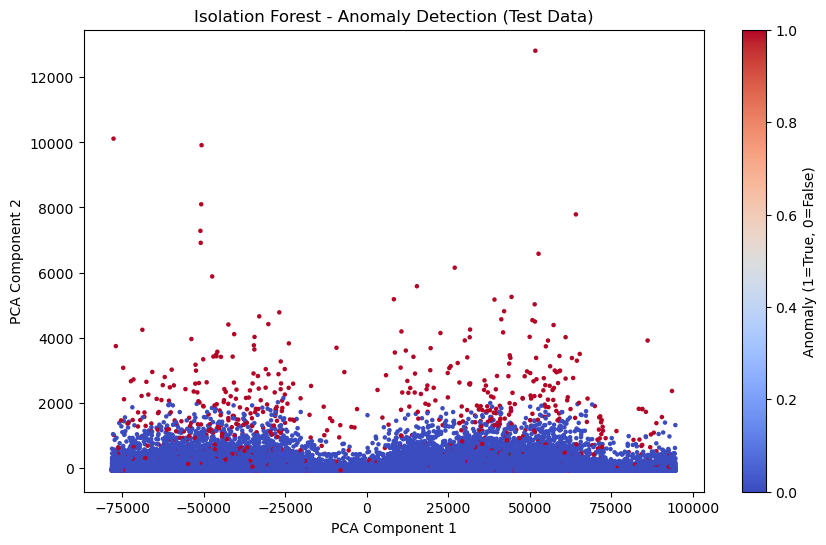

In [21]:
# Step 1: Split data into features and labels
X = credit_card_data.drop(columns=['Class'])  # Features
y = credit_card_data['Class']                # Labels (0 = Normal, 1 = Fraud)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# Step 3: Train Isolation Forest Model
if_model = IsolationForest(contamination=0.02, n_estimators=200, 
                             max_samples='auto',  
                             max_features=1.0, random_state=42)  # Contamination = expected anomaly proportion
if_model.fit(X_train)

# Step 4: Predict Anomalies on Test Data
if_preds = if_model.predict(X_test)

# Map predictions to match fraud detection convention: 1 = Fraud, 0 = Normal
if_preds = np.where(if_preds == 1, 0, 1)  # 1 -> Normal (0), -1 -> Fraud (1)

# Step 4.1: Print Fraud and Non-Fraud Counts in X_test
fraud_count = np.sum(y_test == 1)    # Count fraud cases
normal_count = np.sum(y_test == 0)   # Count normal cases

print(f"\nFraud cases in X_test: {fraud_count}")
print(f"Normal cases in X_test: {normal_count}")


# Step 5: Evaluate the Model
print("\nIsolation Forest Results:")
print("\nClassification Report:")
print(classification_report(y_test, if_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, if_preds)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Plot Confusion Matrix Using Matplotlib
classes = ['Normal', 'Fraud']

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix - Isolation Forest")
plt.colorbar()

# Add axis labels and ticks
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

# Annotate each cell with its value
for i in range(cm.shape[0]):  # Rows
    for j in range(cm.shape[1]):  # Columns
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="black" if cm[i, j] < cm.max() / 2 else "white",
                 fontsize=12)

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Step 7: Visualization of Anomalies using PCA
pca = PCA(n_components=24)  # Reduce features to 2 components for visualization
X_test_pca = pca.fit_transform(X_test)

# Plot anomalies and normal transactions
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=if_preds, cmap='coolwarm', s=5)
plt.title("Isolation Forest - Anomaly Detection (Test Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Anomaly (1=True, 0=False)")
plt.show()


𝐓𝐫𝐮𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐓𝐏): 𝟏𝟎𝟑 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝. 

𝐅𝐚𝐥𝐬𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐅𝐍): 𝟒𝟓 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥. 

𝐓𝐫𝐮𝐞 𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞𝐬 (𝐓𝐍): 𝟖𝟑𝟔𝟔𝟕 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐍𝐨𝐫𝐦𝐚𝐥. 

𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝐅𝐏): 𝟏𝟔𝟐𝟖 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐰𝐫𝐨𝐧𝐠𝐥𝐲 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝.

𝐇𝐢𝐠𝐡 𝐑𝐞𝐜𝐚𝐥𝐥 𝐟𝐨𝐫 𝐅𝐫𝐚𝐮𝐝 𝐂𝐚𝐬𝐞𝐬 (𝟕𝟎%):  𝐓𝐡𝐞 𝐦𝐨𝐝𝐞𝐥 𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐢𝐝𝐞𝐧𝐭𝐢𝐟𝐢𝐞𝐬 𝟏𝟎𝟑 𝐨𝐮𝐭 𝐨𝐟 𝟏𝟒𝟖 𝐟𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬. 𝐓𝐡𝐢𝐬 𝐢𝐬 𝐚 𝐠𝐨𝐨𝐝 𝐫𝐞𝐬𝐮𝐥𝐭 𝐟𝐨𝐫 𝐫𝐞𝐜𝐚𝐥𝐥, 𝐰𝐡𝐢𝐜𝐡 𝐢𝐬 𝐜𝐫𝐢𝐭𝐢𝐜𝐚𝐥 𝐢𝐧 𝐟𝐫𝐚𝐮𝐝 𝐝𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧 𝐬𝐜𝐞𝐧𝐚𝐫𝐢𝐨𝐬. 

𝐅𝐚𝐥𝐬𝐞 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞𝐬 (𝟏𝟔𝟐𝟖):  𝐀 𝐬𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐭 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐰𝐞𝐫𝐞 𝐢𝐧𝐜𝐨𝐫𝐫𝐞𝐜𝐭𝐥𝐲 𝐜𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝. 𝐓𝐡𝐢𝐬 𝐜𝐚𝐧 𝐥𝐞𝐚𝐝 𝐭𝐨 𝐮𝐧𝐧𝐞𝐜𝐞𝐬𝐬𝐚𝐫𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐢𝐠𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐥𝐞𝐠𝐢𝐭𝐢𝐦𝐚𝐭𝐞 𝐭𝐫𝐚𝐧𝐬𝐚𝐜𝐭𝐢𝐨𝐧𝐬. 

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐂𝐡𝐚𝐥𝐥𝐞𝐧𝐠𝐞𝐬:  𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐟𝐨𝐫 𝐅𝐫𝐚𝐮𝐝 𝐢𝐬 𝐯𝐞𝐫𝐲 𝐥𝐨𝐰 (𝟎.𝟎𝟔), 𝐦𝐞𝐚𝐧𝐢𝐧𝐠 𝐭𝐡𝐞 𝐦𝐚𝐣𝐨𝐫𝐢𝐭𝐲 𝐨𝐟 𝐅𝐫𝐚𝐮𝐝 𝐩𝐫𝐞𝐝𝐢𝐜𝐭𝐢𝐨𝐧𝐬 𝐚𝐫𝐞 𝐢𝐧𝐜𝐨𝐫𝐫𝐞𝐜𝐭. 

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐢𝐬 𝐥𝐨𝐰 𝐝𝐮𝐞 𝐭𝐨 𝐭𝐡𝐞 𝐢𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐧𝐚𝐭𝐮𝐫𝐞 𝐨𝐟 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭.

𝐂𝐥𝐚𝐬𝐬 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞 𝐈𝐦𝐩𝐚𝐜𝐭:  𝐓𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐢𝐬 𝐡𝐢𝐠𝐡𝐥𝐲 𝐢𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 (𝟖𝟓𝟐𝟗𝟓 𝐍𝐨𝐫𝐦𝐚𝐥 𝐯𝐬. 𝟏𝟒𝟖 𝐅𝐫𝐚𝐮𝐝). 
𝐈𝐬𝐨𝐥𝐚𝐭𝐢𝐨𝐧 𝐅𝐨𝐫𝐞𝐬𝐭 𝐟𝐨𝐜𝐮𝐬𝐞𝐬 𝐨𝐧 𝐝𝐞𝐭𝐞𝐜𝐭𝐢𝐧𝐠 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬 𝐛𝐮𝐭 𝐬𝐭𝐫𝐮𝐠𝐠𝐥𝐞𝐬 𝐰𝐢𝐭𝐡 𝐩𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐝𝐮𝐞 𝐭𝐨 𝐭𝐡𝐞 𝐝𝐨𝐦𝐢𝐧𝐚𝐧𝐜𝐞 𝐨𝐟 𝐭𝐡𝐞 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐥𝐚𝐬𝐬.


𝐓𝐡𝐞 𝐈𝐬𝐨𝐥𝐚𝐭𝐢𝐨𝐧 𝐅𝐨𝐫𝐞𝐬𝐭 𝐦𝐨𝐝𝐞𝐥 𝐬𝐡𝐨𝐰𝐬 𝐚 𝐭𝐫𝐚𝐝𝐞𝐨𝐟𝐟:  

𝐇𝐢𝐠𝐡 𝐑𝐞𝐜𝐚𝐥𝐥 (𝟎.𝟕𝟎): 𝐒𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥𝐥𝐲 𝐝𝐞𝐭𝐞𝐜𝐭𝐬 𝟕𝟎% 𝐨𝐟 𝐅𝐫𝐚𝐮𝐝 𝐜𝐚𝐬𝐞𝐬. 

𝐋𝐨𝐰 𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧 (𝟎.𝟎𝟔): 𝐌𝐚𝐧𝐲 𝐍𝐨𝐫𝐦𝐚𝐥 𝐜𝐚𝐬𝐞𝐬 𝐚𝐫𝐞 𝐦𝐢𝐬𝐜𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐝 𝐚𝐬 𝐅𝐫𝐚𝐮𝐝, 𝐫𝐞𝐝𝐮𝐜𝐢𝐧𝐠 𝐩𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧.